<a id='toc'></a>

### TABLE OF CONTENTS
* [1. Importing the Data](#importing)<br>
    * [1.1. Describing the datasets](#describing)<br>
    * [1.2. Installing and importing the required libraries](#libraries)<br>
    * [1.3. Importing, integrating and indexing the data](#indexing)<br>
    * [1.4. Checking for duplicates](#duplicates)<br>
* [2. Descriptive Statistics: Exploring and Visualizing the Data](#descriptive)<br>
    * [2.1. Dataset overview](#overview)<br>
    * [2.2. Separating quantitative and qualitative variables](#separating)<br>
    * [2.3. Univariate analysis](#uni)<br>
        * [2.3.1. Quantitative variables](#quant)<br>
        * [2.3.2. Qualitative variables](#qual)<br>
    * [2.4. Multivariate analysis](#multi)<br>
* [3. Cleaning the Data](#cleaning)<br>
    * [3.1. Missing values](#missing)<br>
    * [3.2. Inconsistencies](#inconsistencies)<br>
    * [3.3. Zero and near-zero variance](#nzv)<br>
    * [3.4. Constant and near-constant features](#constant)<br>
* [4. Transforming the Data](#transforming)<br>
    * [4.1. Creating new variables](#new)<br>
    * [4.2. Scaling the data](#scaling)<br>
    * [4.3. Normalizing the data](#normalizing)<br>
    * [4.4. Outlier detection](#outlier)<br>
* [5. Advanced Statistical Exploration](#advanced)<br>
    * [5.1. Multicollinearity detection](#multicollinearity)<br>
    * [5.2. Association between quantitative and qualitative variables](#association)<br>
* [6. Dimensionality Reduction](#dim)<br>
    * [6.1. Principal Component Analysis (PCA) for quantitative variables](#pca)<br>
    * [6.2. Multiple Correspondence Analysis (MCA) for qualitative variables](#mca)<br>

[BACK TO TOC](#toc)
    
# 1. Importing the Data </font>



## 1.1. Describing the datasets
    

- The two datasets, __Demographic__ and __Firmographic__ came from a Portuguese retailer. 
- In each table, we present the __variable name__, its __descrition__, and its __type__.
- Regarding the type, a variable can be:
    - Quantitative discrete;
    - Quantitative continuous;
    - Qualitative nominal;
    - Qualitative ordinal.

__Demographic.xlsx__

| Attribute | Description | Type
| --- | --- | --- |
| Custid | Unique identification of the customer | Qualitative ordinal
| Year_Birth | Customer Year of Birth | Quantitative continuous
| Gender | Costumer Gender | Qualitative nominal
| Education | Costumer Education | Qualitative ordinal
| Marital_Status | Costumer Marital Status | Qualitative nominal
| Dependents | Dependents (Yes = 1) | Qualitative nominal
| Income | Costumer Household Income | Quantitative continuous
| Country | Costumer's Country | Quantitative continuous
| City | Costumer's City | Quantitative continuous


__Firmographic.csv__

| Attribute | Description | Type
| --- | --- | --- |
| Custid | Unique identification of the customer | Qualitative ordinal
| Rcn | Recency in days | Quantitative continuous
| Frq | Total Number of Purchases | Quantitative discrete
| Mnt | Total Amount spent on Purchases | Quantitative continuous
| Clothes | % Amount spent on clothes | Quantitative continuous
| Kitchen | % Amount spent on kitchen products | Quantitative continuous
| SmallAppliances | % Amount spent on small appliances | Quantitative continuous
| HouseKeeping | % Amount spent on housekeeping products | Quantitative continuous
| Toys | % Amount spent on toys | Quantitative continuous
| NetPurchase | % Purchases through the net channel | Quantitative continuous
| StorePurchase | % Purchases through the store | Quantitative continuous
| Recomendation | Recomendation [1-5] | Qualitative ordinal
| Credit_Card | Information about Costumer Credit Card - Flag variable| Qualitative nominal

## 1.2. Installing and importing the required libraries
    

__`Step 1`__ Install and import the following libraries: <br>
- pandas as pd <br>
    - <font color=#7a8a7c>_Pandas is a Python library for data manipulation and analysis, providing easy-to-use data structures and data analysis tools_</font>
- numpy as np <br>
    - <font color=#7a8a7c>_NumPy is a Python library for numerical computing that provides efficient arrays and matrices operations, as well as mathematical functions for arrays._</font>
- pyplot from matplotlib as plt <br>
    - <font color=#7a8a7c>_Matplotlib is a Python library for creating high-quality visualizations, including line plots, scatter plots, bar plots, and more, with extensive customization options._</font>
- seaborn as sns<br>
    - <font color=#7a8a7c>_Seaborn is a Python library for data visualization based on Matplotlib, providing additional high-level interface for creating informative statistical graphics with ease._</font>
    
    
We are going also to import some tools from sklearn: <br>
<font color=#7a8a7c>_Scikit-learn (sklearn) is a Python library for machine learning, providing a wide range of supervised and unsupervised learning algorithms, as well as tools for data preprocessing, model selection, and evaluation._</font>
- MinMaxScaler from sklearn.preprocessing<br>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

## 1.3. Importing, integrating and indexing the data

__`Step 2`__ Import the excel file __demographic.xlsx__ with [read_excel](https://pandas.pydata.org/docs/reference/api/pandas.read_excel.html) and store it in the object __demo__.



In [3]:
demo = pd.read_excel("C:/Users/diogo/OneDrive/Universidade Europeia/Projectos/Conteúdos/LAB01 - Explore and Preprocess/demographic.xlsx")
demo

,Custid,Year_Birth,Gender,Education,Marital_Status,Dependents,Income,Country,City
0,1003,1996,M,Graduation,NaN,1,29761.20,Portugal,NaN
1,1004,1961,M,Master,Married,1,98249.55,Portugal,NaN
2,1006,1988,F,PhD,Together,1,23505.30,Portugal,NaN
3,1007,1975,F,Graduation,Single,1,72959.25,Portugal,NaN
4,1009,1946,F,Graduation,Married,0,114973.95,Portugal,NaN
...,...,...,...,...,...,...,...,...,...
2496,10991,1945,F,Graduation,Married,0,132566.70,Portugal,NaN
2497,10993,1960,F,Graduation,Together,0,91768.95,Portugal,NaN
2498,10994,1966,F,Basic,Married,1,99085.35,Portugal,NaN
2499,10997,1944,F,2n Cycle,Together,1,132260.10,Portugal,NaN


__`Step 3`__ Import the csv file __firmographic.csv__ with [read_csv](https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html) and store it in the object __firmo__.



In [4]:
firmo = pd.read_csv("C:/Users/diogo/OneDrive/Universidade Europeia/Projectos/Conteúdos/LAB01 - Explore and Preprocess/firmographic.csv")
# if your variables are not separated by a ',', you can define the delimiter used by defining the parameter sep
# for example, in case of ';', you should use: firmo = pd.read_csv('firmographic.csv', sep = ';') 
firmo

,Custid,Rcn,Frq,Mnt,Clothes,Kitchen,SmallAppliances,HouseKeeping,Toys,NetPurchase,StorePurchase,Recomendation,Credit_Card
0,1003,69,11,45.76,32.0,19,24,1,24,59,41,3,NaN
1,1004,10,26,923.52,60.0,10,19,6,5,35,65,5,NaN
2,1006,65,14,58.24,47.0,2,48,2,1,67,33,4,NaN
3,1007,73,18,358.80,71.0,7,13,1,8,46,54,4,NaN
4,1009,75,30,1457.04,38.0,9,35,9,9,17,83,5,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2495,10989,41,10,47.84,11.0,40,24,22,2,59,41,3,NaN
2496,10991,36,46,2320.24,32.0,4,47,9,8,22,78,6,NaN
2497,10993,1,25,870.48,56.0,8,27,8,1,47,53,4,NaN
2498,10994,1,28,931.84,68.0,5,21,3,4,55,45,5,NaN


__`Step 4`__ Merge demo and firmo into a a new object, __df__, using [merge](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.merge.html).

In [5]:
df = demo.merge(firmo, on = 'Custid' )

__`Step 5`__ Choose the variable "Custid" as the dataframe's index with [set_index](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.set_index.html).

In [6]:
df.set_index('Custid', inplace = True)
df

,Year_Birth,Gender,Education,Marital_Status,Dependents,Income,Country,City,Rcn,Frq,Mnt,Clothes,Kitchen,SmallAppliances,HouseKeeping,Toys,NetPurchase,StorePurchase,Recomendation,Credit_Card
Custid,,,,,,,,,,,,,,,,,,,,
1003,1996,M,Graduation,NaN,1,29761.20,Portugal,NaN,69,11,45.76,32.0,19,24,1,24,59,41,3,NaN
1004,1961,M,Master,Married,1,98249.55,Portugal,NaN,10,26,923.52,60.0,10,19,6,5,35,65,5,NaN
1006,1988,F,PhD,Together,1,23505.30,Portugal,NaN,65,14,58.24,47.0,2,48,2,1,67,33,4,NaN
1007,1975,F,Graduation,Single,1,72959.25,Portugal,NaN,73,18,358.80,71.0,7,13,1,8,46,54,4,NaN
1009,1946,F,Graduation,Married,0,114973.95,Portugal,NaN,75,30,1457.04,38.0,9,35,9,9,17,83,5,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10989,2001,F,Basic,Single,1,29551.20,Portugal,NaN,41,10,47.84,11.0,40,24,22,2,59,41,3,NaN
10991,1945,F,Graduation,Married,0,132566.70,Portugal,NaN,36,46,2320.24,32.0,4,47,9,8,22,78,6,NaN
10993,1960,F,Graduation,Together,0,91768.95,Portugal,NaN,1,25,870.48,56.0,8,27,8,1,47,53,4,NaN


## 1.4. Checking for duplicates

__`Step 6`__ Check if the dataset has duplicates and drop them, with [duplicated](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.drop_duplicates.html) and [drop.duplicates](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.duplicated.html).

In [7]:
df[df.duplicated()]

,Year_Birth,Gender,Education,Marital_Status,Dependents,Income,Country,City,Rcn,Frq,Mnt,Clothes,Kitchen,SmallAppliances,HouseKeeping,Toys,NetPurchase,StorePurchase,Recomendation,Credit_Card
Custid,,,,,,,,,,,,,,,,,,,,
1285,1982,F,Master,Married,1,68893.65,Portugal,NaN,50,16,270.4,83.0,1,14,1,1,54,46,3,NaN


In [8]:
df.drop_duplicates(inplace = True)
df

,Year_Birth,Gender,Education,Marital_Status,Dependents,Income,Country,City,Rcn,Frq,Mnt,Clothes,Kitchen,SmallAppliances,HouseKeeping,Toys,NetPurchase,StorePurchase,Recomendation,Credit_Card
Custid,,,,,,,,,,,,,,,,,,,,
1003,1996,M,Graduation,NaN,1,29761.20,Portugal,NaN,69,11,45.76,32.0,19,24,1,24,59,41,3,NaN
1004,1961,M,Master,Married,1,98249.55,Portugal,NaN,10,26,923.52,60.0,10,19,6,5,35,65,5,NaN
1006,1988,F,PhD,Together,1,23505.30,Portugal,NaN,65,14,58.24,47.0,2,48,2,1,67,33,4,NaN
1007,1975,F,Graduation,Single,1,72959.25,Portugal,NaN,73,18,358.80,71.0,7,13,1,8,46,54,4,NaN
1009,1946,F,Graduation,Married,0,114973.95,Portugal,NaN,75,30,1457.04,38.0,9,35,9,9,17,83,5,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10989,2001,F,Basic,Single,1,29551.20,Portugal,NaN,41,10,47.84,11.0,40,24,22,2,59,41,3,NaN
10991,1945,F,Graduation,Married,0,132566.70,Portugal,NaN,36,46,2320.24,32.0,4,47,9,8,22,78,6,NaN
10993,1960,F,Graduation,Together,0,91768.95,Portugal,NaN,1,25,870.48,56.0,8,27,8,1,47,53,4,NaN


[BACK TO TOC](#toc)
    
# 2. Descriptive Statistics: Exploring and Visualizing the Data </font>

## 2.1. Overview

__`Step 7`__ Find the number of rows (observations) and columns (features) in your dataset with [shape](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.shape.html).

In [9]:
df.shape

(2500, 20)

__`Step 8`__ Retrieve the columns' labels with [columns](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.columns.html).

In [10]:
df.columns

Index(['Year_Birth', 'Gender', 'Education', 'Marital_Status', 'Dependents',
       'Income', 'Country', 'City', 'Rcn', 'Frq', 'Mnt', 'Clothes', 'Kitchen',
       'SmallAppliances', 'HouseKeeping', 'Toys', 'NetPurchase',
       'StorePurchase', 'Recomendation', 'Credit_Card'],
      dtype='object')

__`Step 9`__ Take a good look at the first (five, by default) rows of your dataset with [head](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.head.html). You can also look at the last ones using [tail](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.tail.html).

In [11]:
df.head()

,Year_Birth,Gender,Education,Marital_Status,Dependents,Income,Country,City,Rcn,Frq,Mnt,Clothes,Kitchen,SmallAppliances,HouseKeeping,Toys,NetPurchase,StorePurchase,Recomendation,Credit_Card
Custid,,,,,,,,,,,,,,,,,,,,
1003,1996,M,Graduation,NaN,1,29761.20,Portugal,NaN,69,11,45.76,32.0,19,24,1,24,59,41,3,NaN
1004,1961,M,Master,Married,1,98249.55,Portugal,NaN,10,26,923.52,60.0,10,19,6,5,35,65,5,NaN
1006,1988,F,PhD,Together,1,23505.30,Portugal,NaN,65,14,58.24,47.0,2,48,2,1,67,33,4,NaN
1007,1975,F,Graduation,Single,1,72959.25,Portugal,NaN,73,18,358.80,71.0,7,13,1,8,46,54,4,NaN
1009,1946,F,Graduation,Married,0,114973.95,Portugal,NaN,75,30,1457.04,38.0,9,35,9,9,17,83,5,Yes


__`Step 10`__ Use [info](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.info.html) to find a list of features with a count of valid values and the type used to store the data.

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2500 entries, 1003 to 10997
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Year_Birth       2500 non-null   int64  
 1   Gender           2500 non-null   object 
 2   Education        2493 non-null   object 
 3   Marital_Status   2483 non-null   object 
 4   Dependents       2500 non-null   int64  
 5   Income           2431 non-null   float64
 6   Country          2500 non-null   object 
 7   City             73 non-null     object 
 8   Rcn              2500 non-null   int64  
 9   Frq              2500 non-null   int64  
 10  Mnt              2500 non-null   float64
 11  Clothes          2495 non-null   float64
 12  Kitchen          2500 non-null   int64  
 13  SmallAppliances  2500 non-null   int64  
 14  HouseKeeping     2500 non-null   int64  
 15  Toys             2500 non-null   int64  
 16  NetPurchase      2500 non-null   int64  
 17  StorePurchase  

__VERY IMPORTANT:__ The table tells us that there are 3 features stored as __float__, 11 as __integers__, and 6 as __object__. However, this does not mean that we have 14 numerical variables and 6 categorical ones. It would be a mistake! It only tells us how Pandas stores each value.

## 2.2. Separating quantitative and qualitative variables

Quantitative and qualitative variables require different analysis techniques. For clarity, we collect quantitative and qualitative features in separate dataframes.

__`Step 11`__ Create a new dataframe for quantitative variables, __quant_df__. Use [select_dtypes](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.select_dtypes.html#pandas.DataFrame.select_dtypes) with _include=number_ to choose features with float and integer.
"Dependents" is a qualitative nominal variable and "Recomendation" is a qualitative ordinal one. Store them in an object called __qualitative variables__ and drop them from quant_df.

In [10]:
quant_df = df.select_dtypes(include=['number'])
qualitative_variables = ["Dependents", "Recomendation"]
quant_df = quant_df.drop(columns=qualitative_variables, errors='ignore')
quant_df

,Year_Birth,Income,Rcn,Frq,Mnt,Clothes,Kitchen,SmallAppliances,HouseKeeping,Toys,NetPurchase,StorePurchase
Custid,,,,,,,,,,,,
1003,1996,29761.20,69,11,45.76,32.0,19,24,1,24,59,41
1004,1961,98249.55,10,26,923.52,60.0,10,19,6,5,35,65
1006,1988,23505.30,65,14,58.24,47.0,2,48,2,1,67,33
1007,1975,72959.25,73,18,358.80,71.0,7,13,1,8,46,54
1009,1946,114973.95,75,30,1457.04,38.0,9,35,9,9,17,83
...,...,...,...,...,...,...,...,...,...,...,...,...
10989,2001,29551.20,41,10,47.84,11.0,40,24,22,2,59,41
10991,1945,132566.70,36,46,2320.24,32.0,4,47,9,8,22,78
10993,1960,91768.95,1,25,870.48,56.0,8,27,8,1,47,53


We have 12 quantitative variables.

__`Step 12`__ Define a function to create a dataframe with qualitative variables, __qual_df__. Change the type of Dependents and Recomendation from numeric to string with [astype](https://pandas.pydata.org/docs/user_guide/basics.html#astype).

In [11]:
qual_df = df.select_dtypes(exclude='number')
for column in qualitative_variables:
    if column in df.columns:
        qual_df[column] = df[column]

qual_df[['Dependents', 'Recomendation']] = df[['Dependents', 'Recomendation']].astype(str)
qual_df

# Alternatively, using a dictionary to specify the conversion for clarity
#df = df.astype({'column1': 'str', 'column2': 'str'})


,Gender,Education,Marital_Status,Country,City,Credit_Card,Dependents,Recomendation
Custid,,,,,,,,
1003,M,Graduation,NaN,Portugal,NaN,NaN,1,3
1004,M,Master,Married,Portugal,NaN,NaN,1,5
1006,F,PhD,Together,Portugal,NaN,NaN,1,4
1007,F,Graduation,Single,Portugal,NaN,NaN,1,4
1009,F,Graduation,Married,Portugal,NaN,Yes,0,5
...,...,...,...,...,...,...,...,...
10989,F,Basic,Single,Portugal,NaN,NaN,1,3
10991,F,Graduation,Married,Portugal,NaN,NaN,0,6
10993,F,Graduation,Together,Portugal,NaN,NaN,0,4


We have 8 qualitative variables.

## 2.3. Univariate analysis

### 2.3.1. Quantitative variables

__`Step 15`__ Check the __value count__, the __Five Number Summary__ (Minimum, Quarter 1=Percentile25%, Median=Percentile50%, Quarter 3=Percentile 75%, Maximum), the __mean__ and the __standard deviation__ with [describe](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.describe.html).

In [87]:
quant_df.describe().round(2)
# df.describe().T

,Year_Birth,Income,Rcn,Frq,Mnt,Clothes,Kitchen,SmallAppliances,HouseKeeping,Toys,NetPurchase,StorePurchase
count,2500.00,2431.00,2500.00,2500.00,2500.00,2495.00,2500.00,2500.00,2500.00,2500.00,2500.00,2500.00
mean,1971.74,74062.84,62.94,19.99,654.83,51.01,6.96,28.23,6.88,6.93,42.08,57.92
std,17.05,28807.23,69.64,10.95,676.45,23.38,7.84,12.62,7.63,7.92,18.27,18.27
min,1942.00,10500.00,0.00,3.00,8.32,2.00,0.00,2.00,0.00,0.00,5.00,12.00
25%,1957.00,51013.73,27.00,11.00,66.56,33.50,2.00,19.00,2.00,1.00,27.00,43.00
50%,1971.00,74525.85,53.00,18.00,401.96,51.00,4.00,27.00,4.00,4.00,45.00,55.00
75%,1986.00,97300.88,78.00,28.00,1069.12,70.00,9.00,37.00,9.00,10.00,57.00,73.00
max,2002.00,144204.90,549.00,58.00,3055.52,98.00,68.00,69.00,54.00,77.00,88.00,95.00


__`Step 16`__ Define a function to calculate the __Coefficient of Variation (CV)__.

In [61]:
cv = lambda x: np.std(x, ddof=1) / np.mean(x) * 100
quant_df.apply(cv).round(2)

Year_Birth           0.86
Income              38.90
Rcn                110.65
Frq                 54.79
Mnt                103.30
Clothes             45.83
Kitchen            112.62
SmallAppliances     44.69
HouseKeeping       110.94
Toys               114.31
NetPurchase         43.43
StorePurchase       31.55
dtype: float64

__`Step 17`__ Calculate the __skewness__ of each variable with [skew](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.skew.html#pandas.DataFrame.skew). A skewness value near 0 indicates a symmetrical distribution, values greater than 0 indicate a right-skewed distribution, and values less than 0 indicate a left-skewed distribution.

In [62]:
quant_df.skew().round(2)

Year_Birth         0.07
Income            -0.01
Rcn                4.08
Frq                0.70
Mnt                0.99
Clothes           -0.07
Kitchen            2.19
SmallAppliances    0.32
HouseKeeping       2.01
Toys               2.41
NetPurchase       -0.24
StorePurchase      0.24
dtype: float64

__`Step 18`__ Calculate the __kurtosis__ of each variable with [kurt](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.kurt.html#pandas.DataFrame.kurt).

In [63]:
quant_df.kurt().round(2)

Year_Birth         -1.16
Income             -0.88
Rcn                20.08
Frq                -0.39
Mnt                -0.02
Clothes            -0.92
Kitchen             6.86
SmallAppliances    -0.47
HouseKeeping        5.00
Toys                9.24
NetPurchase        -1.03
StorePurchase      -1.03
dtype: float64

__`Step 19`__ Check the __missing values__, reported as __nan__ (Not a Number) with [isna](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.isna.html#pandas.DataFrame.isna).

In [88]:
quant_df.isna().sum()

Year_Birth          0
Income             69
Rcn                 0
Frq                 0
Mnt                 0
Clothes             5
Kitchen             0
SmallAppliances     0
HouseKeeping        0
Toys                0
NetPurchase         0
StorePurchase       0
dtype: int64

Income has 69 missing values, and Clothes has 5.

__`Step 20`__ Plot the __discrete variable__ "Frq" using a __barchart__. Since the variable has many different values, we will classify it first, using [cut](https://pandas.pydata.org/docs/reference/api/pandas.cut.html#pandas.cut). The number of observations is higher than 50, so the number of classes (bins) must be between 15 and 20.

In [137]:
frq_bins = pd.cut(quant_df['Frq'], 15)
frq_bins = pd.DataFrame(frq_bins)
frq_bins

,Frq
Custid,
1003,"(10.333, 14.0]"
1004,"(25.0, 28.667]"
1006,"(10.333, 14.0]"
1007,"(17.667, 21.333]"
1009,"(28.667, 32.333]"
...,...
10989,"(6.667, 10.333]"
10991,"(43.333, 47.0]"
10993,"(21.333, 25.0]"


We now build a barchart using [plotly](https://github.com/plotly).

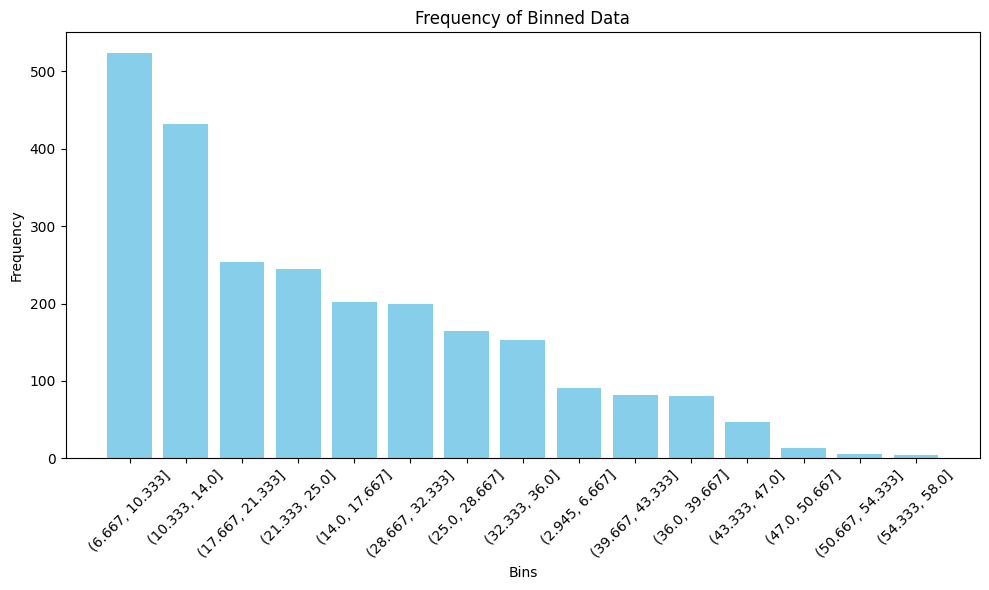

In [138]:
bin_counts = frq_bins['Frq'].value_counts()
bin_counts.index = bin_counts.index.astype(str)
plt.figure(figsize=(10, 6))
plt.bar(bin_counts.index, bin_counts.values, color='skyblue')

plt.title('Frequency of Binned Data')
plt.xlabel('Bins')
plt.ylabel('Frequency')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

__`Step 21`__ Create __histograms__ for all __continuous variables__.

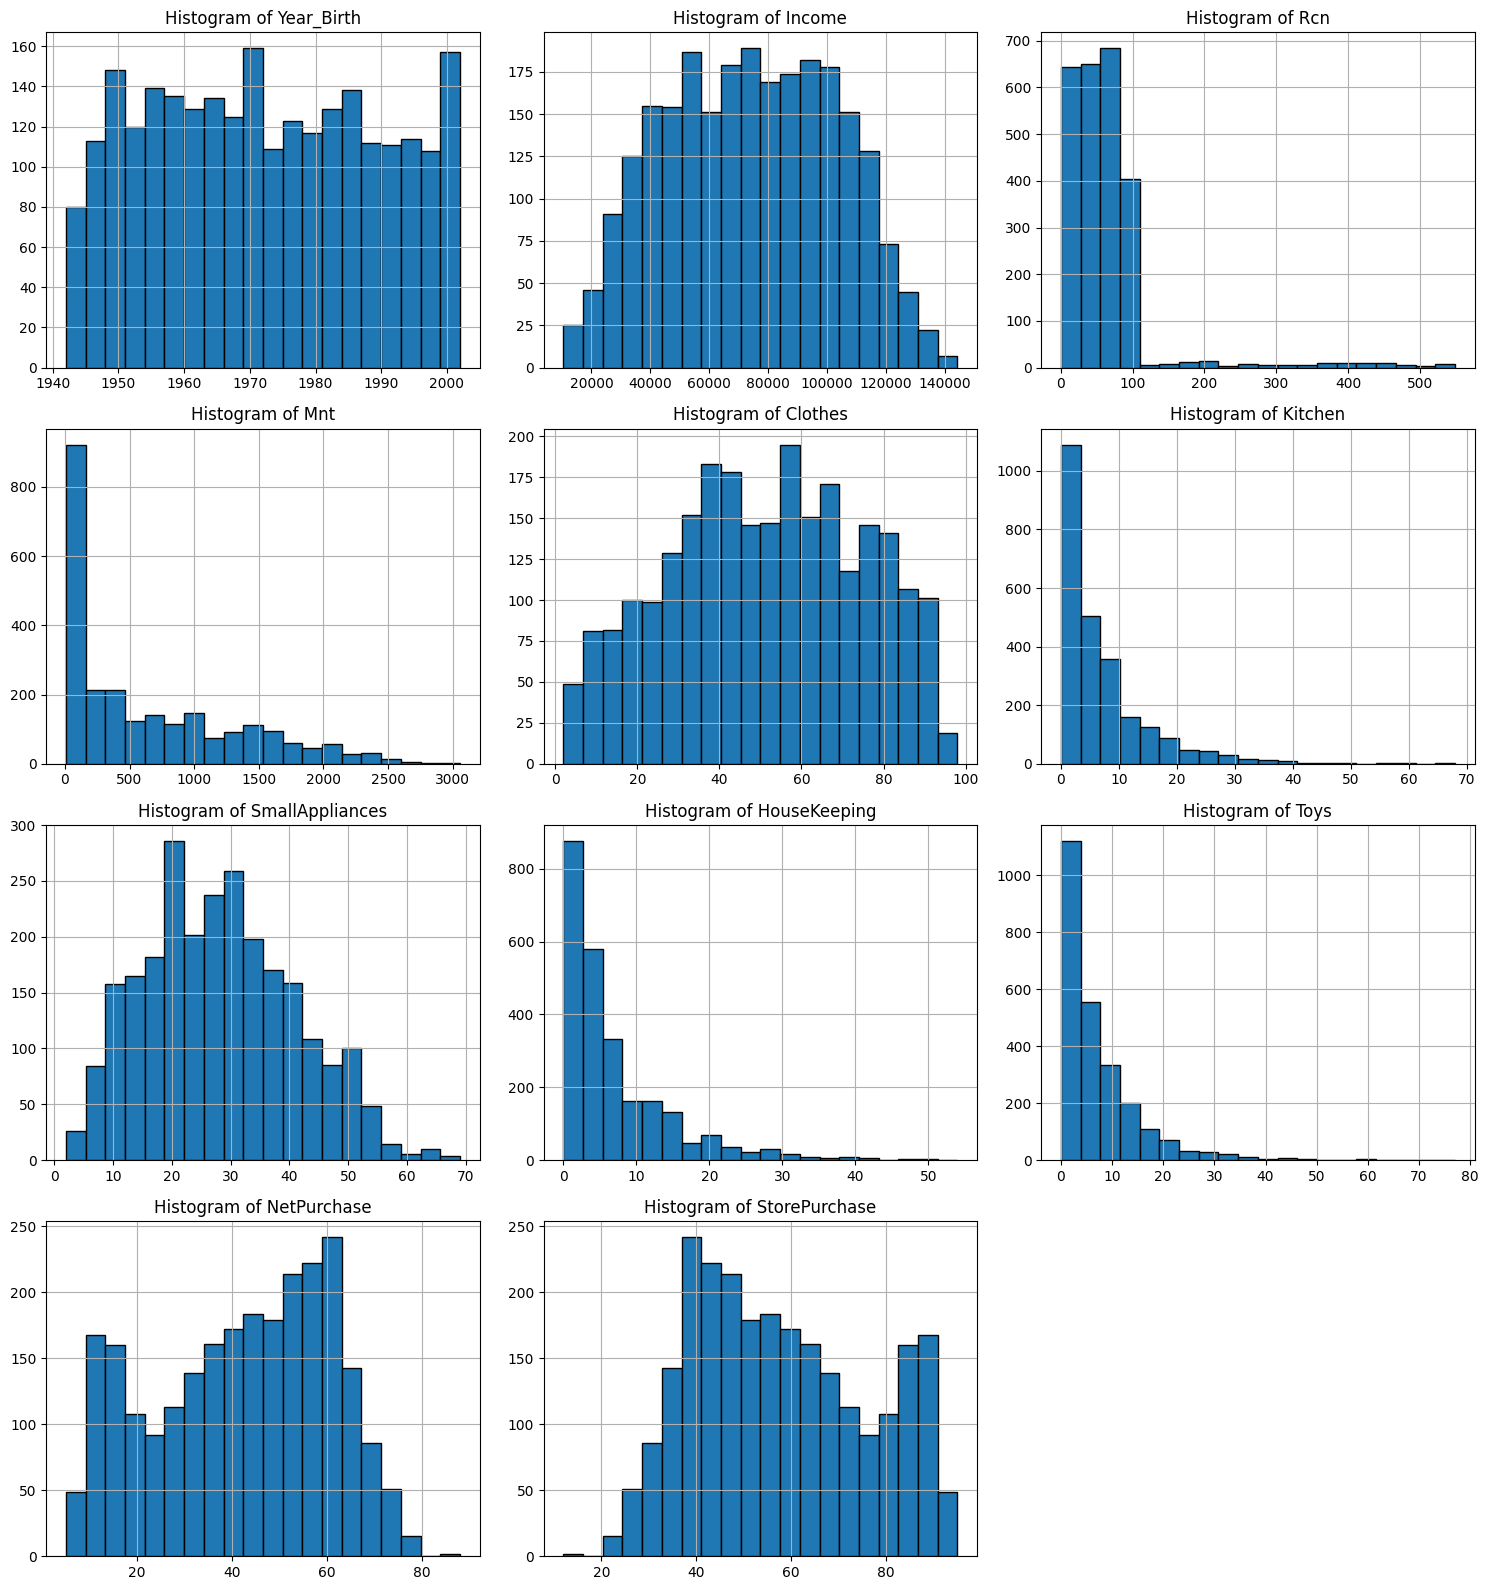

In [139]:
columns_to_exclude = 'Frq'

df_plot = quant_df.drop(columns=[columns_to_exclude]) # Exclude the specified column from the DataFrame copy for plotting
n_vars = df_plot.shape[1]  # Number of variables (columns) in the DataFrame
n_cols = 3  # Number of columns in the subplot grid
n_rows = (n_vars + n_cols - 1) // n_cols  # Calculate rows needed, round up

fig, axs = plt.subplots(n_rows, n_cols, figsize=(n_cols*5, n_rows*4)) # Create a figure and a grid of subplots


axs = axs.flatten() # Flatten the array of axes, for easy iterating

for i, var in enumerate(df_plot.columns): # Plot histogram on ith subplot
    df_plot[var].hist(ax=axs[i], bins=20, edgecolor='black')
    axs[i].set_title(f'Histogram of {var}')
    
for i in range(n_vars, len(axs)): # Hide any unused subplots if the number of variables is not a multiple of n_cols
    axs[i].set_visible(False)

plt.tight_layout()  # Adjust subplots to fit into figure area.
plt.show()

__`Step 22`__ Create __boxplots__ for all __quantitative variables__ (both discrete and continuous).

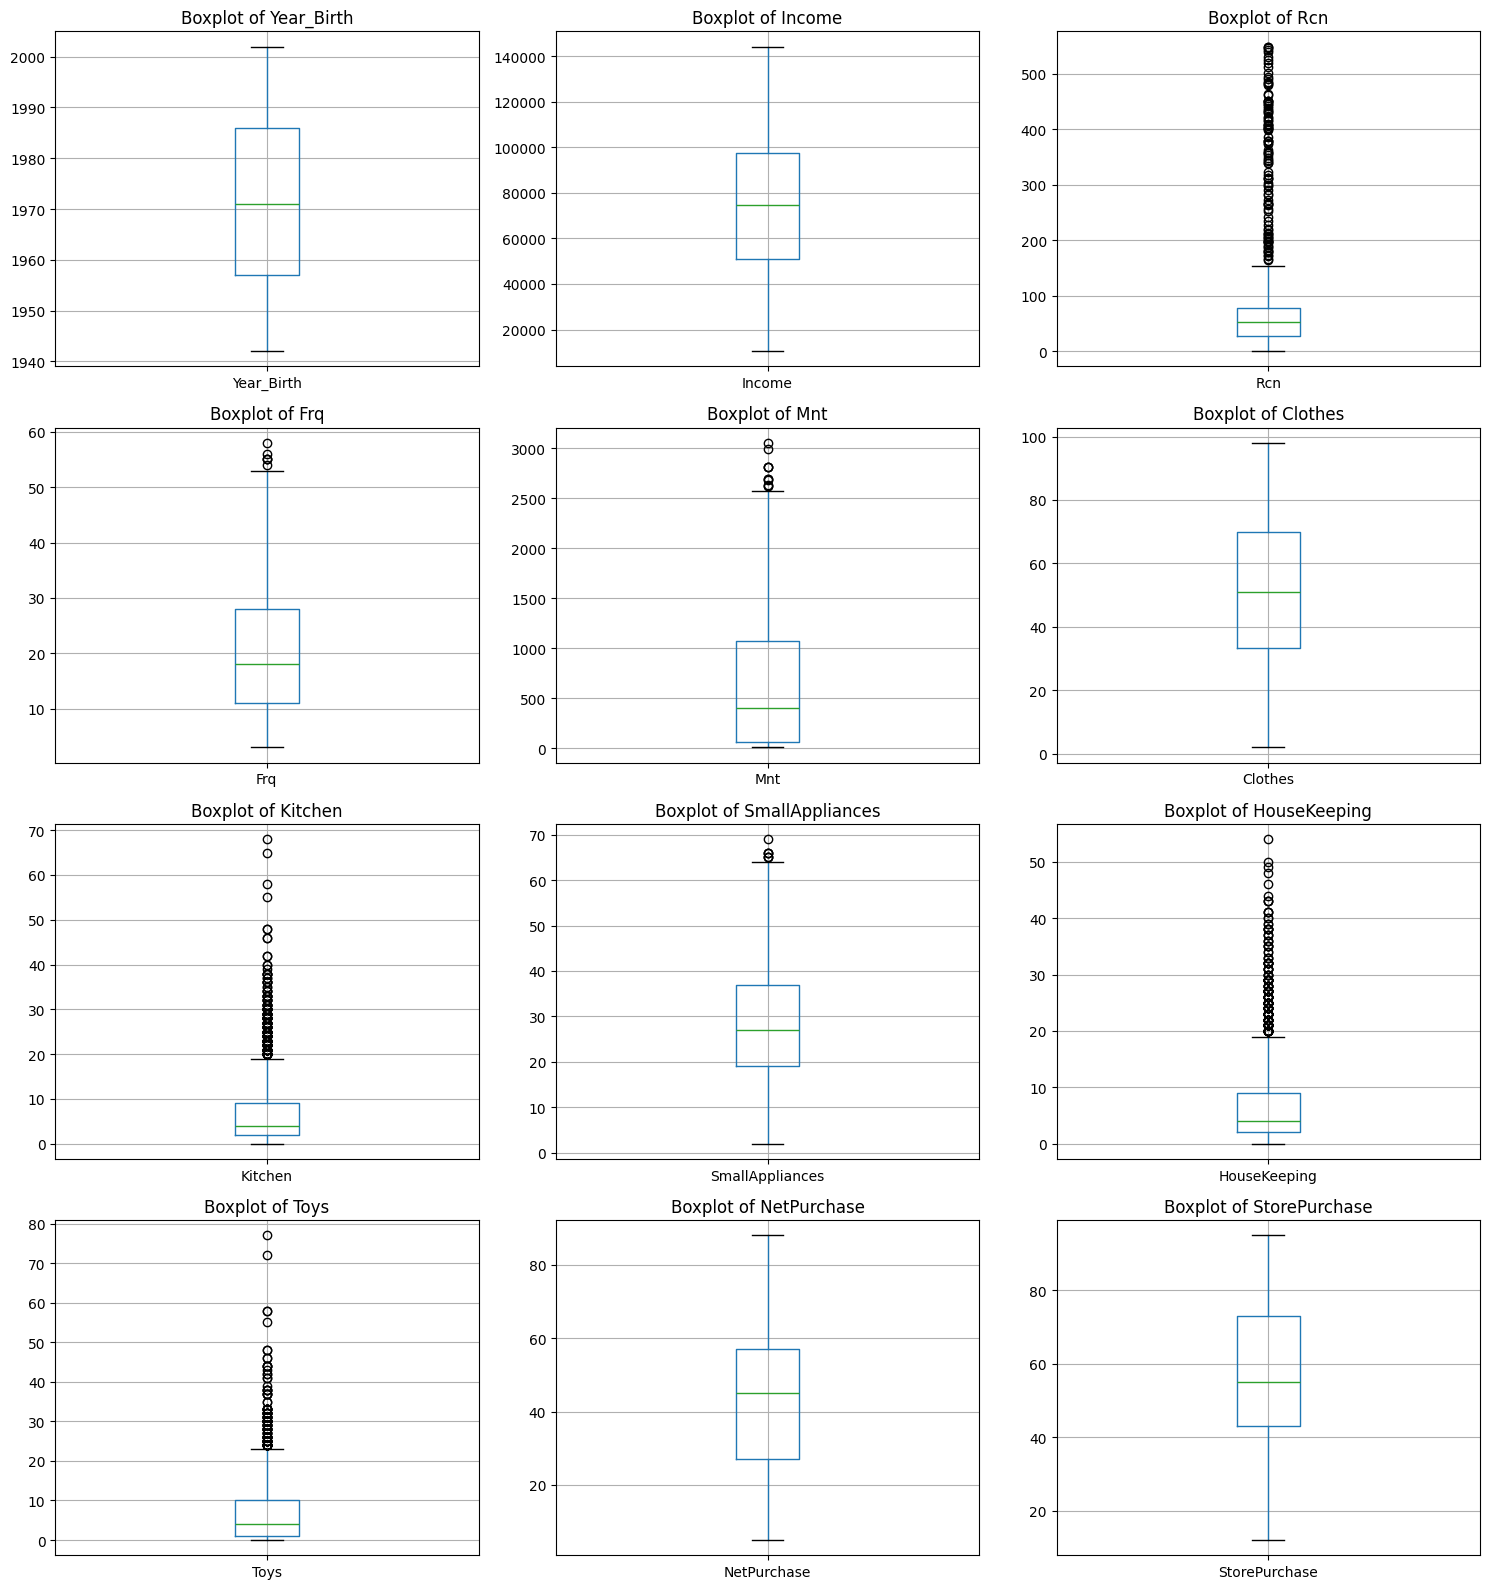

In [140]:
# Determine the number of rows and columns for the subplot grid
n_vars = quant_df.shape[1]  # Number of variables (columns) in the DataFrame
n_cols = 3  # Number of columns in the subplot grid
n_rows = (n_vars + n_cols - 1) // n_cols  # Calculate rows needed, round up

fig, axs = plt.subplots(n_rows, n_cols, figsize=(n_cols*5, n_rows*4)) # Create a figure and a grid of subplots

axs = axs.flatten() # Flatten the array of axes, for easy iterating

for i, var in enumerate(quant_df.columns):
    # Plot boxplot on ith subplot. Note: boxplot() requires a 2D array or DataFrame; 
    # for a single column DataFrame, we use [[var]] to keep it as a DataFrame
    quant_df[[var]].boxplot(ax=axs[i])
    axs[i].set_title(f'Boxplot of {var}')
    
for i in range(n_vars, len(axs)): # Hide any unused subplots if the number of variables is not a multiple of n_cols
    axs[i].set_visible(False)

plt.tight_layout()  # Adjust subplots to fit into figure area.
plt.show()

### 2.3.2. Qualitative variables

__`Step 23`__ Use __describe__ with _include=all_ to get the __value count__, the number of __unique values__, the __mode__ (top) the frequency of the mode (freq). 

In [69]:
qual_df.describe(include='all')

,Gender,Education,Marital_Status,Country,City,Credit_Card,Dependents,Recomendation
count,2500,2493,2483,2500,73,67,2500,2500
unique,3,6,9,1,1,2,2,6
top,F,Graduation,Married,Portugal,Lisbon,No,1,4
freq,1910,1224,915,2500,73,35,1753,753


__`Step 24`__ Tabulate each qualitative variable to find its __categories__ and __frequencies__ with [value.counts](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.value_counts.html#pandas.DataFrame.value_counts).

In [76]:
qual_df['Gender'].value_counts()

Gender
F    1910
M     585
?       5
Name: count, dtype: int64

In 'Gender' there are 5 unclassified observations.

In [77]:
qual_df['Education'].value_counts()

Education
Graduation    1224
2n Cycle       425
Master         372
Basic          299
PhD            167
nan              7
OldSchool        6
Name: count, dtype: int64

In 'Education' we have:
- 7 nan (i.e. Not a Number);
- 6 observations self-styled OldSchool, which is not an official designation.

In [78]:
qual_df['Marital_Status'].value_counts()

Marital_Status
Married         915
Together        604
Single          596
Divorced        230
Widow           115
BigConfusion     19
nan              17
TOGETHER          2
MARRIED           1
DIVORCED          1
Name: count, dtype: int64

In 'Marital_Status' we have:
- 17 nan;
- Married, Together and Divorced with different spelling;
- 19 observations self-styled BigConfusion.

In [79]:
qual_df['Country'].value_counts()

Country
Portugal    2500
Name: count, dtype: int64

This variable is unary, i.e., has no variance. It has only one value.

In [80]:
qual_df['City'].value_counts()

City
nan       2427
Lisbon      73
Name: count, dtype: int64

This variable has only 73 valid values.

In [81]:
qual_df['Credit_Card'].value_counts()

Credit_Card
nan    2433
No       35
Yes      32
Name: count, dtype: int64

This variable has only 67 valid values.

In [85]:
qual_df['Dependents'].value_counts()

Dependents
1    1753
0     747
Name: count, dtype: int64

In [86]:
qual_df['Recomendation'].value_counts()

Recomendation
4    753
5    679
3    573
2    296
6    193
1      6
Name: count, dtype: int64

Although the variable description claims that recomendation is measured on a scale [1-5], there were 193 individuals that chose level 6. This makes it unlikely that 6 is a mistake. So, the correct scale must be [1-6].

__`Step 25`__ Create barcharts for __qualitative variables__.

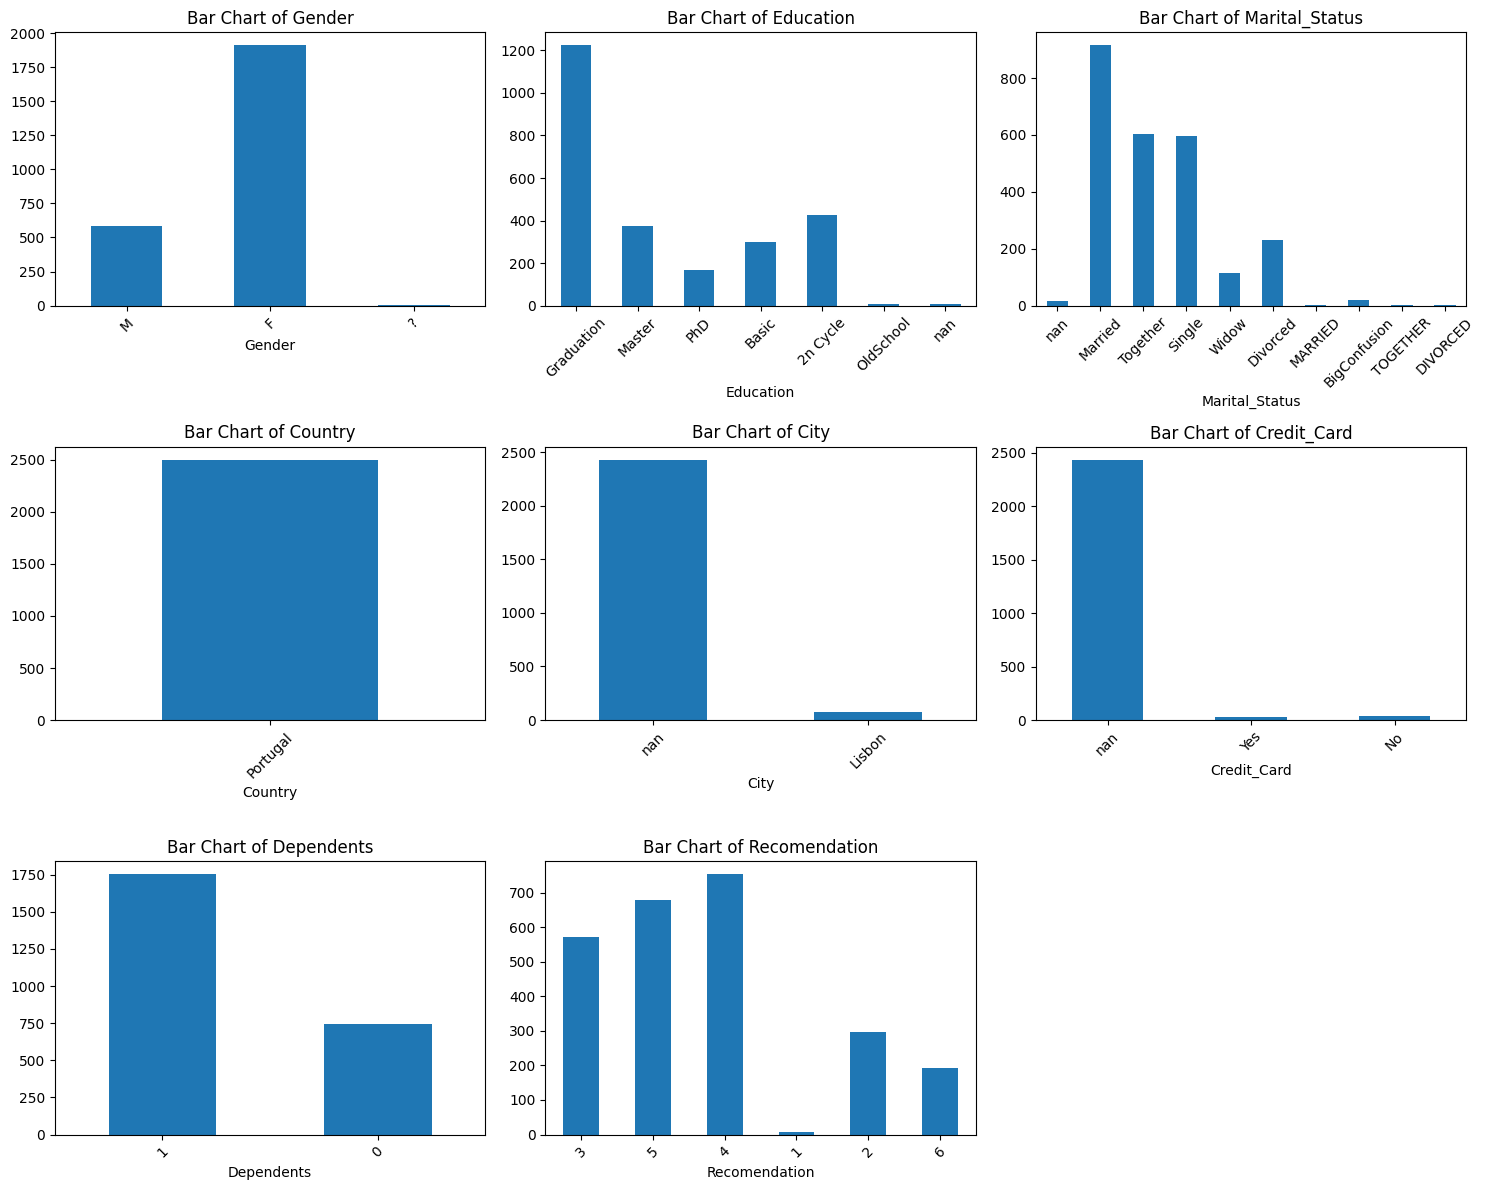

In [75]:
qual_df = qual_df.astype(str)

# Determine the number of rows and columns for the subplot grid
n_vars = qual_df.shape[1]  # Number of variables (columns) in the DataFrame
n_cols = 3  # Number of columns in the subplot grid
n_rows = (n_vars + n_cols - 1) // n_cols  # Calculate rows needed, round up

fig, axs = plt.subplots(n_rows, n_cols, figsize=(n_cols*5, n_rows*4)) # Create a figure and a grid of subplots

axs = axs.flatten() # Flatten the array of axes, for easy iterating

for i, var in enumerate(qual_df.columns):
    # Get ordered category counts
    ordered_counts = qual_df[var].value_counts().reindex(qual_df[var].unique(), fill_value=0)
    # Plot bar chart on ith subplot
    ordered_counts.plot(kind='bar', ax=axs[i])
    axs[i].set_title(f'Bar Chart of {var}')
    axs[i].tick_params(axis='x', rotation=45)  # Rotate x-axis labels for better readability

for i in range(n_vars, len(axs)): # Hide any unused subplots if the number of variables is not a multiple of n_cols
    axs[i].set_visible(False)

plt.tight_layout()  # Adjust subplots to fit into figure area.
plt.show()

## 2.4. Multivariate analysis

__`Step 26`__ Perform __correlation analysis__ on your quantitative variables, using [corr](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.corr.html#pandas.DataFrame.corr). You can choose 3 methods: _"pearson"_, _"spearman"_, or _"kendall"_. Use a [seaborn.heatmap](https://seaborn.pydata.org/generated/seaborn.heatmap.html) to enhance interpretation.

<Axes: >

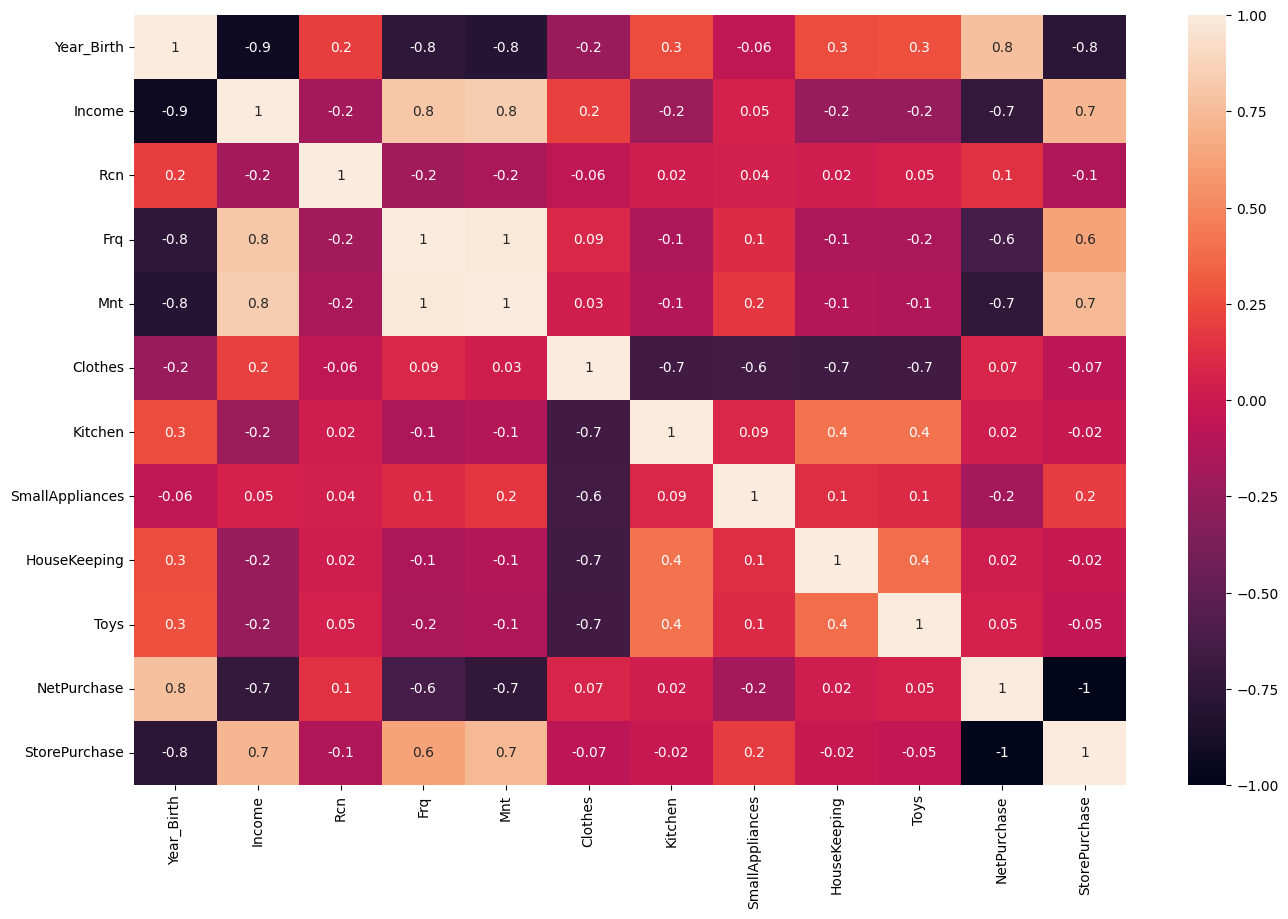

In [141]:
df_corr = quant_df.select_dtypes(include=['number']).corr(method = 'pearson')
figure = plt.figure(figsize=(16,10))
sns.heatmap(df_corr, annot=True, fmt = '.1g')

We can also perform multivariate analysis on qualitative data, or dataset-wide, mixing qualitative and quantitative variables. We will do it after cleaning the data.

__`Step 27`__ There are several exploratory tools to compare variables group-wise. Here are some examples with [pairplot](https://seaborn.pydata.org/generated/seaborn.pairplot.html#seaborn-pairplot), [countplot](https://seaborn.pydata.org/generated/seaborn.countplot.html#seaborn-countplot), [stripplot](https://seaborn.pydata.org/generated/seaborn.stripplot.html#seaborn-stripplot), [groupby](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.groupby.html#pandas.DataFrame.groupby) and [query](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.query.html#pandas.DataFrame.query).

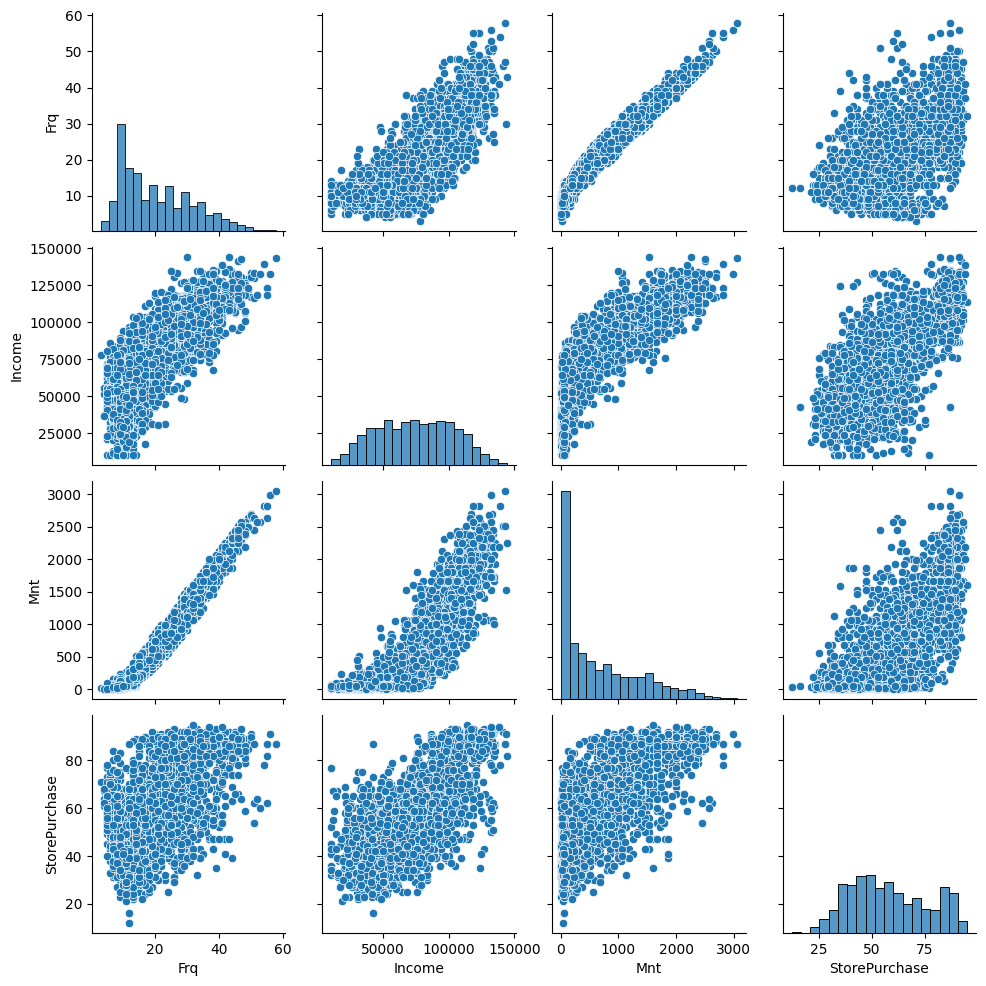

In [90]:
sns.pairplot(df[['Frq','Income','Mnt','StorePurchase']])

<Axes: xlabel='count', ylabel='Marital_Status'>

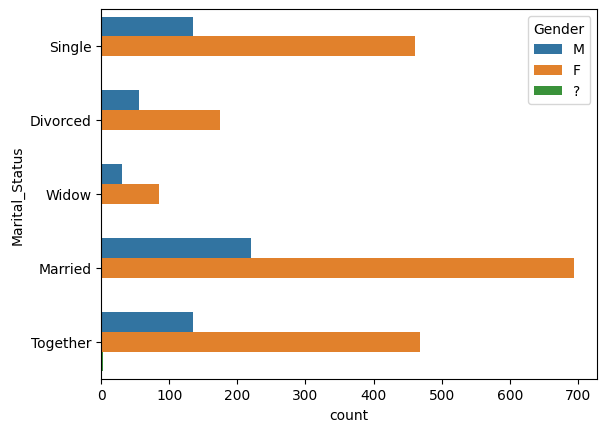

In [142]:
sns.countplot(y = 'Marital_Status', hue = 'Gender', data = df,
             order = ['Single','Divorced','Widow','Married','Together'])

<Axes: xlabel='Income', ylabel='Education'>

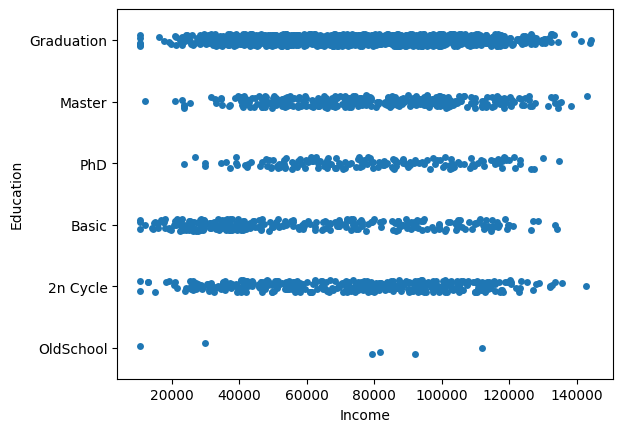

In [143]:
sns.stripplot(x = 'Income', y = 'Education', data = df)

In [144]:
df.groupby('Dependents')['Mnt'].mean()

Dependents
0    1276.316680
1     389.997627
Name: Mnt, dtype: float64

In [145]:
df.query('Gender == "F"').groupby('Dependents')['Mnt'].median()

Dependents
0    1333.28
1     195.52
Name: Mnt, dtype: float64

[BACK TO TOC](#toc)
    
# 3. Cleaning the Data </font>

## 3.1. Missing values

__`Step 28`__ Make a copy of quantitative data to insert the corrections, while keeping the original.

In [13]:
quant_df2 = quant_df.copy()
quant_df2

,Year_Birth,Income,Rcn,Frq,Mnt,Clothes,Kitchen,SmallAppliances,HouseKeeping,Toys,NetPurchase,StorePurchase
Custid,,,,,,,,,,,,
1003,1996,29761.20,69,11,45.76,32.0,19,24,1,24,59,41
1004,1961,98249.55,10,26,923.52,60.0,10,19,6,5,35,65
1006,1988,23505.30,65,14,58.24,47.0,2,48,2,1,67,33
1007,1975,72959.25,73,18,358.80,71.0,7,13,1,8,46,54
1009,1946,114973.95,75,30,1457.04,38.0,9,35,9,9,17,83
...,...,...,...,...,...,...,...,...,...,...,...,...
10989,2001,29551.20,41,10,47.84,11.0,40,24,22,2,59,41
10991,1945,132566.70,36,46,2320.24,32.0,4,47,9,8,22,78
10993,1960,91768.95,1,25,870.48,56.0,8,27,8,1,47,53


__`Step 29`__ Use [fillna]() to replace the missing values in "Income" and "Clothes" with the median. Check the missing values aftertwords.

In [14]:
quant_df2.fillna({
    'Income':quant_df2['Income'].median(),
    'Clothes':quant_df2['Clothes'].median()
    }, inplace = True)

In [15]:
quant_df2.isna().sum()

Year_Birth         0
Income             0
Rcn                0
Frq                0
Mnt                0
Clothes            0
Kitchen            0
SmallAppliances    0
HouseKeeping       0
Toys               0
NetPurchase        0
StorePurchase      0
dtype: int64

__`Step 30`__ Make a copy of qualitative data to insert the corrections, while keeping the original.

In [16]:
qual_df2 = qual_df.copy()
qual_df2

,Gender,Education,Marital_Status,Country,City,Credit_Card,Dependents,Recomendation
Custid,,,,,,,,
1003,M,Graduation,NaN,Portugal,NaN,NaN,1,3
1004,M,Master,Married,Portugal,NaN,NaN,1,5
1006,F,PhD,Together,Portugal,NaN,NaN,1,4
1007,F,Graduation,Single,Portugal,NaN,NaN,1,4
1009,F,Graduation,Married,Portugal,NaN,Yes,0,5
...,...,...,...,...,...,...,...,...
10989,F,Basic,Single,Portugal,NaN,NaN,1,3
10991,F,Graduation,Married,Portugal,NaN,NaN,0,6
10993,F,Graduation,Together,Portugal,NaN,NaN,0,4


__`Step 31`__ Use filna to replace the missing values in "Education" and "Marital Status" with the mode, and in "City" and "Credit_Card" with 'Missing'. Check the missing values afterwords.

In [19]:
qual_df2.fillna({
    'Education': qual_df2['Education'].mode()[0],
    'Marital_Status': qual_df2['Marital_Status'].mode()[0],
    'City': 'Missing',
    'Credit_Card': 'Missing'
    }, inplace = True)

In [20]:
qual_df2.isna().sum()

Gender            0
Education         0
Marital_Status    0
Country           0
City              0
Credit_Card       0
Dependents        0
Recomendation     0
dtype: int64

## 3.2. Inconsistencies

__`Step 32`__ Use [replace]() to swap '?' for the mode in "Gender".

In [21]:
qual_df2['Gender'] = qual_df2['Gender'].replace('?',qual_df2['Gender'].mode()[0])
qual_df2['Gender'].value_counts()

Gender
F    1915
M     585
Name: count, dtype: int64

__`Step 33`__ Use [capitalize](https://pandas.pydata.org/docs/reference/api/pandas.Series.str.capitalize.html#pandas.Series.str.capitalize) to make uniform the spelling of the categories in "Marital_Status", since some of the values were in all caps.

In [22]:
qual_df2['Marital_Status'] = qual_df2['Marital_Status'].str.capitalize() 
qual_df2['Marital_Status'].value_counts()

Marital_Status
Married         933
Together        606
Single          596
Divorced        231
Widow           115
Bigconfusion     19
Name: count, dtype: int64

__`Step 34`__ Replace 'BigConfusion' with 'Other' in "Marital_Status".

In [23]:
qual_df2['Marital_Status'] = qual_df2['Marital_Status'].replace('Bigconfusion','Other')
qual_df2['Marital_Status'].value_counts()

Marital_Status
Married     933
Together    606
Single      596
Divorced    231
Widow       115
Other        19
Name: count, dtype: int64

__`Step 35`__ Replace 'OldSchool' with 'Basic' in "Education".

In [24]:
qual_df2['Education'] = qual_df2['Education'].replace('OldSchool','Basic')
qual_df2['Education'].value_counts()

Education
Graduation    1231
2n Cycle       425
Master         372
Basic          305
PhD            167
Name: count, dtype: int64

## 3.3. Zero and near-zero variance

__`Step 36`__ Remove __unary__ (or zero-variance) or __near_zero__ quantitative variables. We use a function from Scikit-learn called [VarianceThreshold](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.VarianceThreshold.html). We want to keep only the variables with, at least, 95% of different values (or with a frequency of unique values lower than 5%).

In [28]:
from sklearn.feature_selection import VarianceThreshold
quant_df2.shape

(2500, 12)

The function yields the columns we want to keep (because they are not invariant).

In [30]:
near_constant_filter = VarianceThreshold(threshold=0.05)
near_constant_filter.fit(quant_df2)
len(quant_df2.columns[near_constant_filter.get_support()])

12

## 3.4. Constant and near-constant features

__`Step 37`__ Define a function to assess if a qualitative variable has __constant__ or __near-constant__ values. The notion is very similar to the one in the previous step. However, qualitative variables have no variance. <br>
Check all columns in a DataFrame to determine if they are constant or near-constant.
    
__Parameters:__
- df: pandas DataFrame
- threshold: the threshold for considering a column as near-constant
    
__Returns:__
- A dictionary where each key is a column name and each value is a tuple:
    - is_constant: True if the column has the same value across all rows, False otherwise
    - is_near_constant: True if the column is near-constant according to the threshold, False otherwise

In [31]:
def check_all_columns_constant_or_near_constant(qual_df2, threshold=0.95):
    
    results = {}
    
    for column in qual_df2.columns:
        # Drop NA values for accurate counting
        non_null_values = qual_df2[column].dropna()
        
        # Calculate the frequency of each value in the column
        value_counts = non_null_values.value_counts()
        
        # Check if the column is constant
        is_constant = len(value_counts) == 1
        
        # Check if the column is near-constant according to the threshold
        most_common_proportion = value_counts.iloc[0] / non_null_values.count() if non_null_values.count() > 0 else 0
        is_near_constant = most_common_proportion >= threshold
        
        results[column] = (is_constant, is_near_constant)
    
    return results

results = check_all_columns_constant_or_near_constant(qual_df2, threshold=0.95)
for column, result in results.items():
    print(f"Column: {column}, Is constant: {result[0]}, Is near-constant: {result[1]}")


Column: Gender, Is constant: False, Is near-constant: False
Column: Education, Is constant: False, Is near-constant: False
Column: Marital_Status, Is constant: False, Is near-constant: False
Column: Country, Is constant: True, Is near-constant: True
Column: City, Is constant: False, Is near-constant: True
Column: Credit_Card, Is constant: False, Is near-constant: True
Column: Dependents, Is constant: False, Is near-constant: False
Column: Recomendation, Is constant: False, Is near-constant: False


__`Step 38`__ Drop the constant feature "Country" and the near-constant "City" and "Credit_Card".

In [33]:
qual_df2.drop('Country', axis = 1, inplace = True)
qual_df2.drop('City', axis = 1, inplace = True)
qual_df2.drop('Credit_Card', axis = 1, inplace = True)
qual_df2.shape

(2500, 5)

__`Step 39`__ Re-plot the qualitative variables to visually check the results.

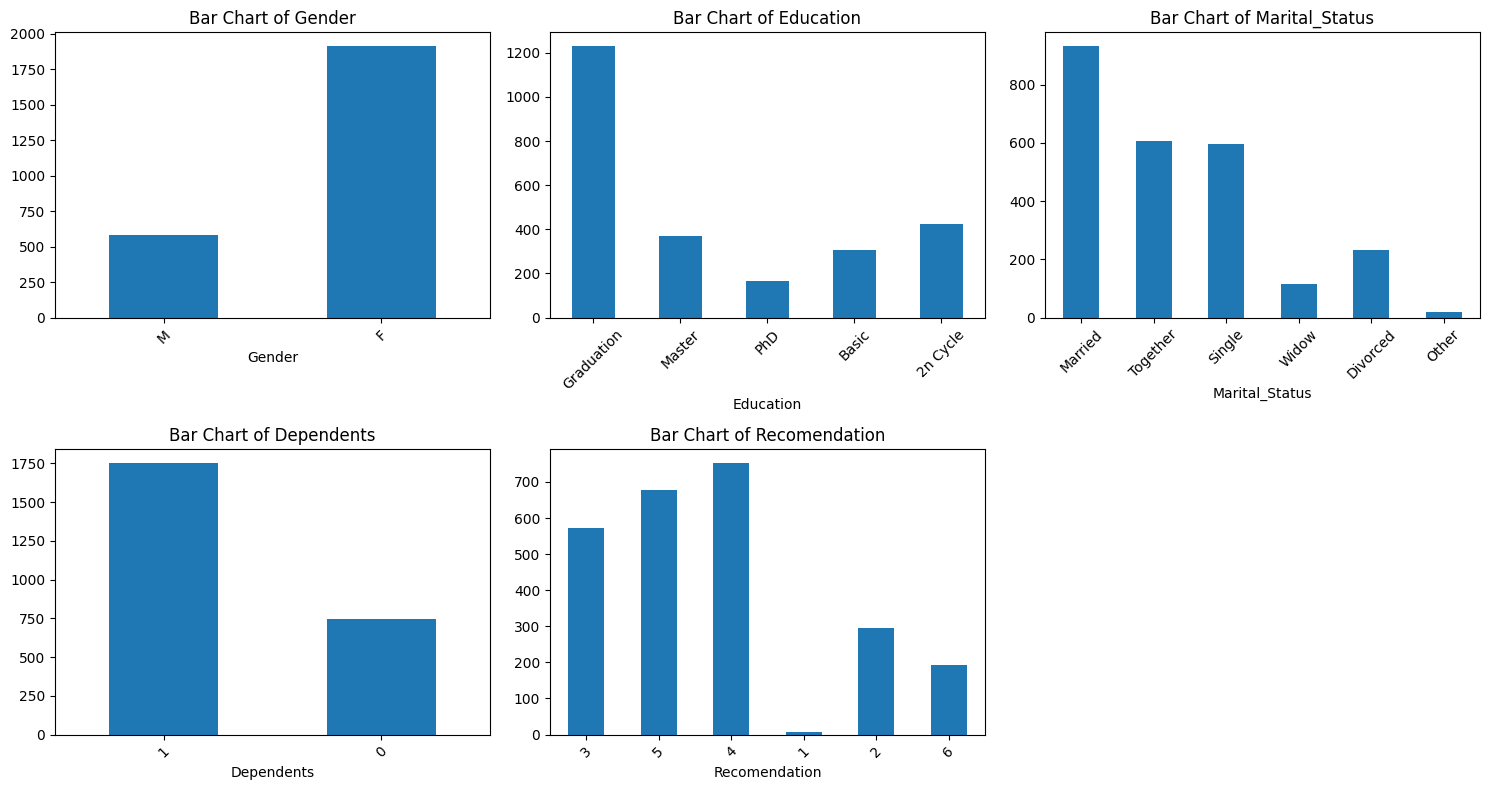

In [150]:
qual_df2 = qual_df2.astype(str)

# Determine the number of rows and columns for the subplot grid
n_vars = qual_df2.shape[1]  # Number of variables (columns) in the DataFrame
n_cols = 3  # Number of columns in the subplot grid
n_rows = (n_vars + n_cols - 1) // n_cols  # Calculate rows needed, round up

fig, axs = plt.subplots(n_rows, n_cols, figsize=(n_cols*5, n_rows*4)) # Create a figure and a grid of subplots

axs = axs.flatten() # Flatten the array of axes, for easy iterating

for i, var in enumerate(qual_df2.columns):
    # Get ordered category counts
    ordered_counts = qual_df2[var].value_counts().reindex(qual_df2[var].unique(), fill_value=0)
    # Plot bar chart on ith subplot
    ordered_counts.plot(kind='bar', ax=axs[i])
    axs[i].set_title(f'Bar Chart of {var}')
    axs[i].tick_params(axis='x', rotation=45)  # Rotate x-axis labels for better readability

for i in range(n_vars, len(axs)): # Hide any unused subplots if the number of variables is not a multiple of n_cols
    axs[i].set_visible(False)

plt.tight_layout()  # Adjust subplots to fit into figure area.
plt.show()

[BACK TO TOC](#toc)
    
# 4. Transforming the Data </font>

## 4.1. Creating new variables

__`Step 40`__ Use [date](https://docs.python.org/3/library/datetime.html) to create a new variable, "Age", from "Year_Birth". Drop "Year_Birth".

In [32]:
from datetime import date
quant_df2['Age'] = date.today().year - quant_df2['Year_Birth']
quant_df2
quant_df2.drop('Year_Birth', axis = 1, inplace = True)

## 4.2. Scaling the data

We need to scale the data to translate all the quantitative features to a __common scale__. The performance of several algorithms is affected when we use features with different magnitudes (v.g. a person's lifespan, in years, and GDP in billions). A sensible way is to use a __linear transformation__ to rescale all the variables between 0 and 1. Standardization entails a nonlinear transformation and it is best avoided.

__`Step 41`__ Use [MinMaxScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html) to scale the quantitative data between __0__ and __1__. The output is an __array__. We must save the __original index__ to include in the new dataframe.

In [153]:
original_index = quant_df2.index
scaled_df = MinMaxScaler().fit_transform(quant_df2)
scaled_df

array([[0.14405755, 0.12568306, 0.14545455, ..., 0.65060241, 0.34939759,
        0.1       ],
       [0.6562927 , 0.01821494, 0.41818182, ..., 0.36144578, 0.63855422,
        0.68333333],
       [0.09726869, 0.11839709, 0.2       , ..., 0.74698795, 0.25301205,
        0.23333333],
       ...,
       [0.60782327, 0.00182149, 0.4       , ..., 0.5060241 , 0.4939759 ,
        0.7       ],
       [0.66254378, 0.00182149, 0.45454545, ..., 0.60240964, 0.39759036,
        0.6       ],
       [0.91066296, 0.13661202, 0.63636364, ..., 0.48192771, 0.51807229,
        0.96666667]])

__`Step 41`__ Change the array back into a __dataframe__. Include the original column labels and the index.

In [154]:
cols = quant_df2.columns
scaled_df = pd.DataFrame(scaled_df, columns = cols, index=original_index)
scaled_df.round(2)

,Income,Rcn,Frq,Mnt,Clothes,Kitchen,SmallAppliances,HouseKeeping,Toys,NetPurchase,StorePurchase,Age
Custid,,,,,,,,,,,,
1003,0.14,0.13,0.15,0.01,0.31,0.28,0.33,0.02,0.31,0.65,0.35,0.10
1004,0.66,0.02,0.42,0.30,0.60,0.15,0.25,0.11,0.06,0.36,0.64,0.68
1006,0.10,0.12,0.20,0.02,0.47,0.03,0.69,0.04,0.01,0.75,0.25,0.23
1007,0.47,0.13,0.27,0.12,0.72,0.10,0.16,0.02,0.10,0.49,0.51,0.45
1009,0.78,0.14,0.49,0.48,0.38,0.13,0.49,0.17,0.12,0.14,0.86,0.93
...,...,...,...,...,...,...,...,...,...,...,...,...
10989,0.14,0.07,0.13,0.01,0.09,0.59,0.33,0.41,0.03,0.65,0.35,0.02
10991,0.91,0.07,0.78,0.76,0.31,0.06,0.67,0.17,0.10,0.20,0.80,0.95
10993,0.61,0.00,0.40,0.28,0.56,0.12,0.37,0.15,0.01,0.51,0.49,0.70


## 4.3. Normalizing the data

__Normalization__ is always required, since some algorithms rely on (approximately) normally distributed variables.

__`Step 42`__ Apply a __power transformation__ to normalize your scaled data with [PowerTransformer](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PowerTransformer.html) and _method=yeo-johnson_. We set _standardize=False_ because we scaled the data in the previous step. The output of the power transformer function is an array, so we must convert it to a dataframe at the end. Again, we must include the original index.

In [157]:
from sklearn.preprocessing import PowerTransformer
yeo_johnson_transformer = PowerTransformer(method='yeo-johnson',standardize=False)
df_transformed = yeo_johnson_transformer.fit_transform(scaled_df)
df_transformed = pd.DataFrame(df_transformed, columns=quant_df2.columns, index=original_index)


__`Step 43`__ Plot the histograms of the variables to see the results of the tranformation.

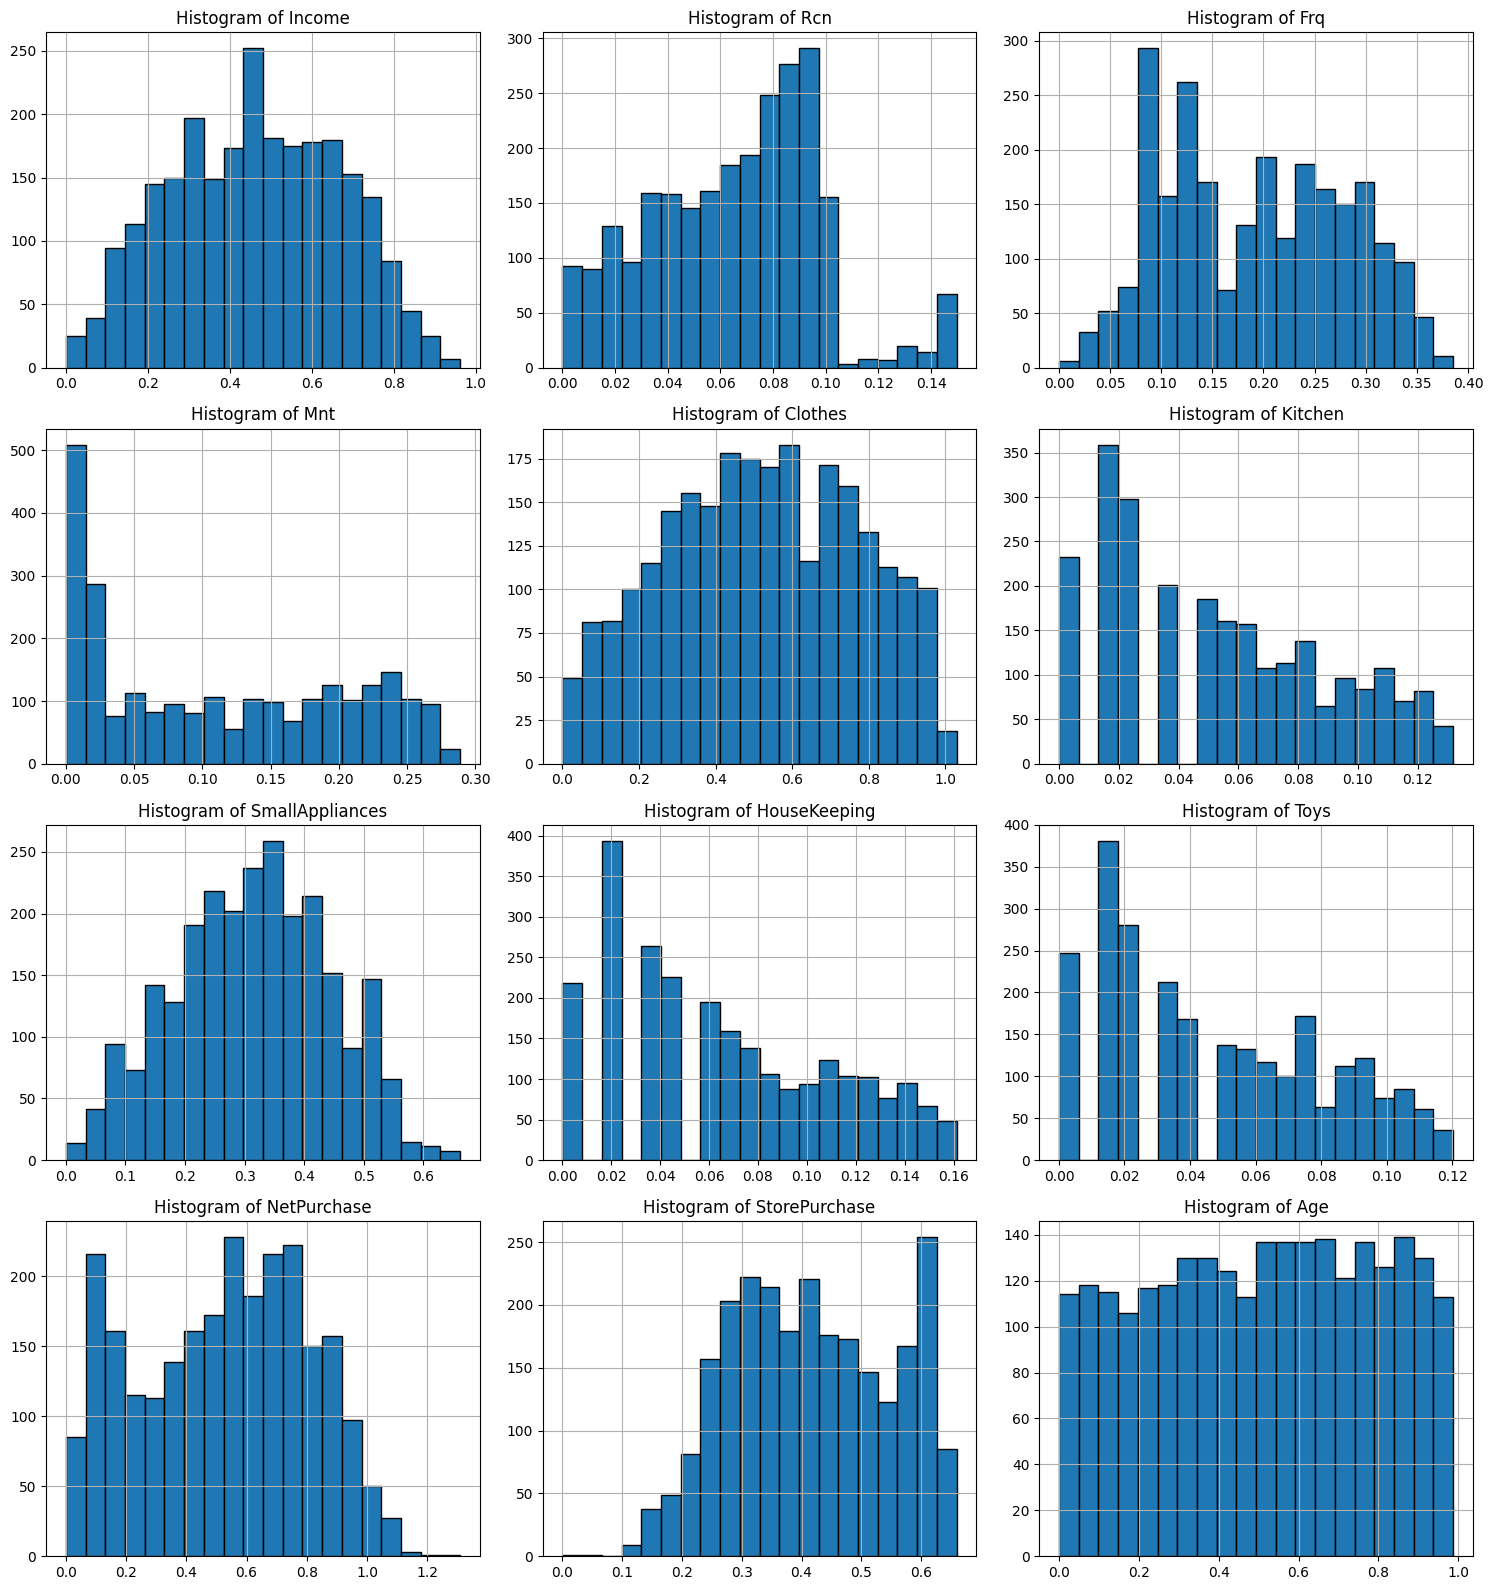

In [42]:
#columns_to_exclude = 'Frq'

# Exclude the specified column from the DataFrame copy for plotting
#df_plot = quant_df.drop(columns=[columns_to_exclude])
n_vars = df_transformed.shape[1]  # Number of variables (columns) in the DataFrame
n_cols = 3  # Number of columns in the subplot grid
n_rows = (n_vars + n_cols - 1) // n_cols  # Calculate rows needed, round up

# Create a figure and a grid of subplots
fig, axs = plt.subplots(n_rows, n_cols, figsize=(n_cols*5, n_rows*4))

# Flatten the array of axes, for easy iterating
axs = axs.flatten()

for i, var in enumerate(df_transformed.columns):
    # Plot histogram on ith subplot
    df_transformed[var].hist(ax=axs[i], bins=20, edgecolor='black')
    axs[i].set_title(f'Histogram of {var}')
    
# Hide any unused subplots if the number of variables is not a multiple of n_cols
for i in range(n_vars, len(axs)):
    axs[i].set_visible(False)

plt.tight_layout()  # Adjust subplots to fit into figure area.
plt.show()

The histograms show that the Yeo-Johnson transformation is not always successful.

## 4.4. Outlier detection

__`Step 44`__ Detect __outliers__ by visual inspection of the __boxplots__ of the normalized variables.

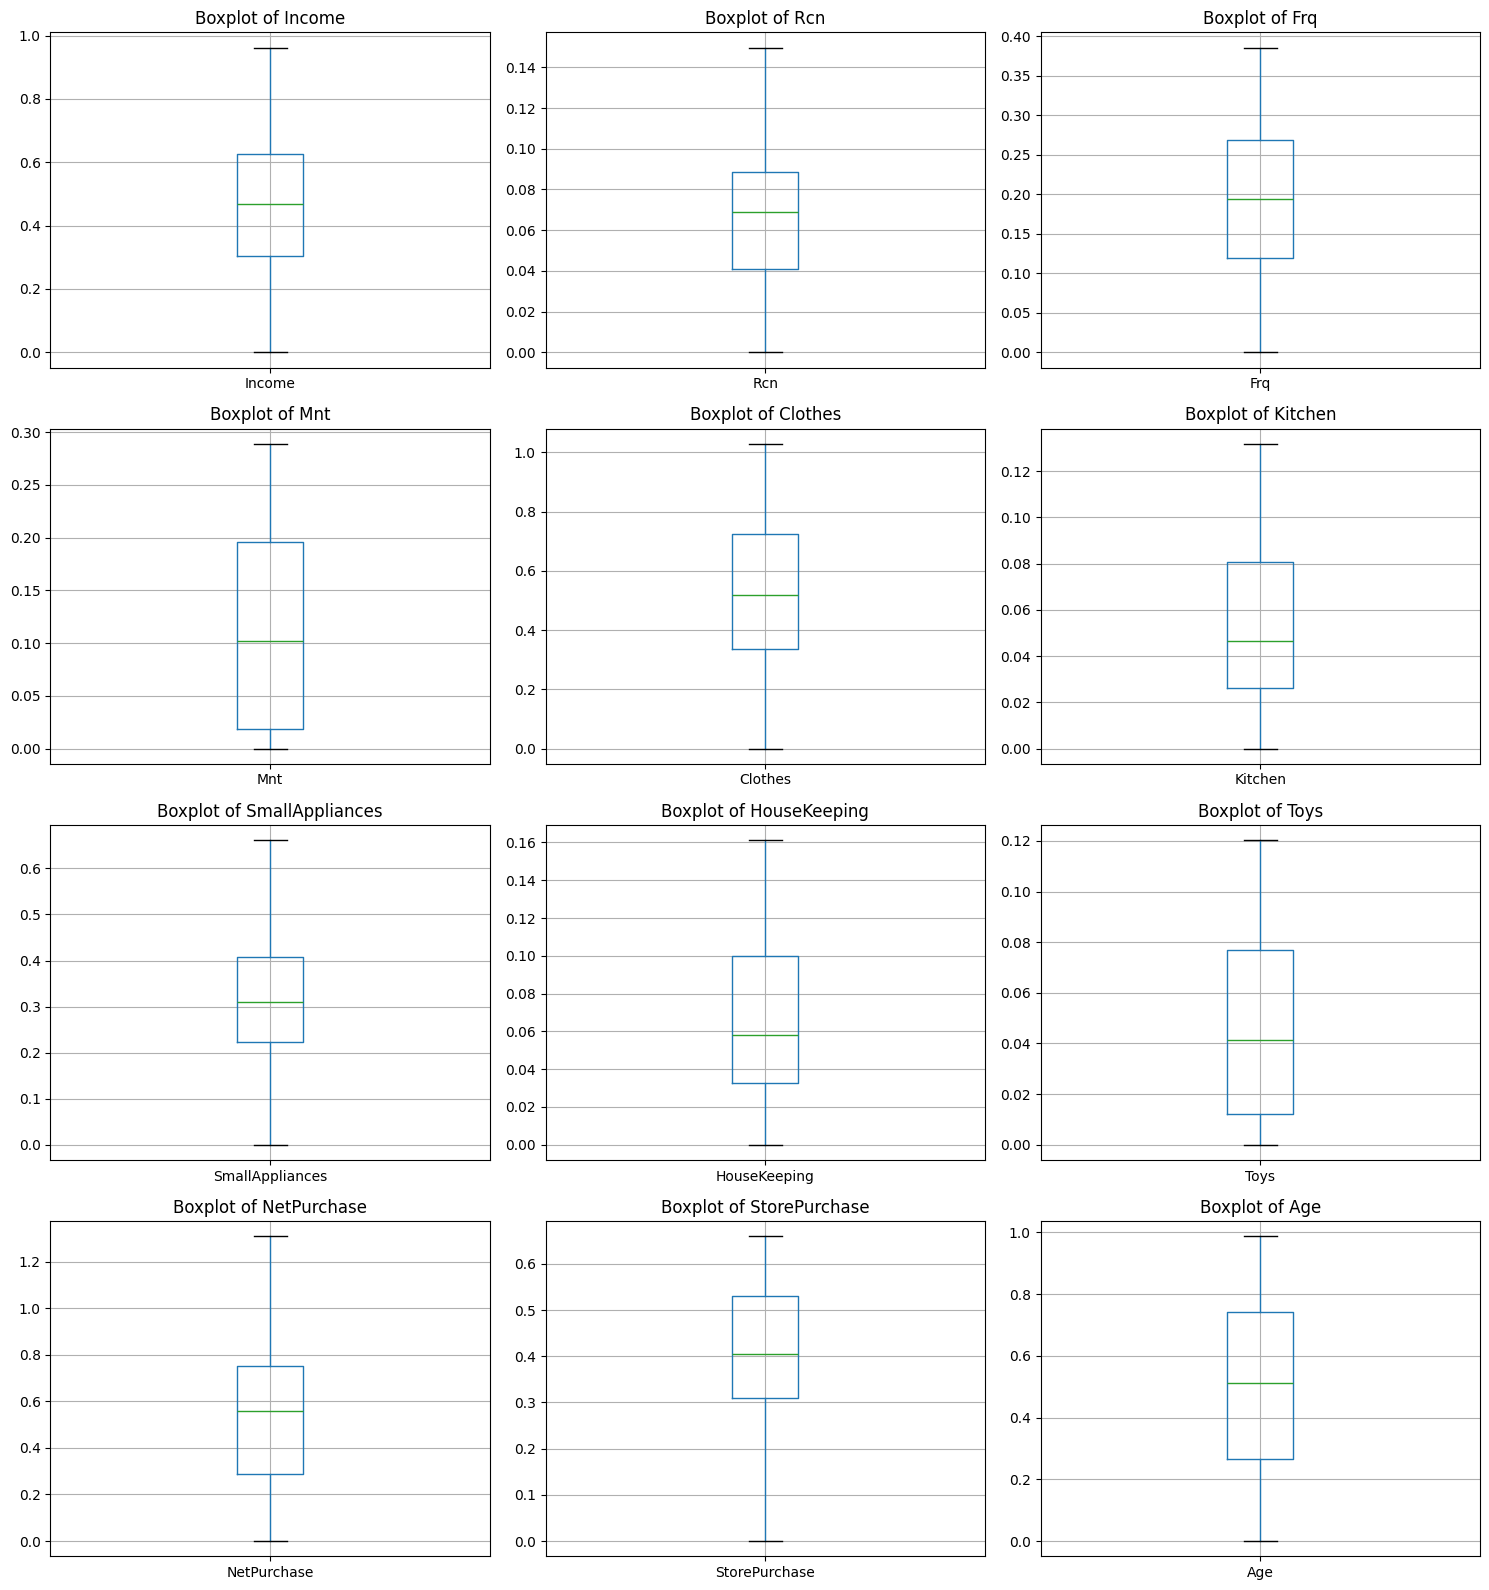

In [43]:
# Determine the number of rows and columns for the subplot grid
n_vars = df_transformed.shape[1]  # Number of variables (columns) in the DataFrame
n_cols = 3  # Number of columns in the subplot grid
n_rows = (n_vars + n_cols - 1) // n_cols  # Calculate rows needed, round up

# Create a figure and a grid of subplots
fig, axs = plt.subplots(n_rows, n_cols, figsize=(n_cols*5, n_rows*4))

# Flatten the array of axes, for easy iterating
axs = axs.flatten()

for i, var in enumerate(df_transformed.columns):
    # Plot boxplot on ith subplot. Note: boxplot() requires a 2D array or DataFrame; 
    # for a single column DataFrame, we use [[var]] to keep it as a DataFrame
    df_transformed[[var]].boxplot(ax=axs[i])
    axs[i].set_title(f'Boxplot of {var}')
    
# Hide any unused subplots if the number of variables is not a multiple of n_cols
for i in range(n_vars, len(axs)):
    axs[i].set_visible(False)

plt.tight_layout()  # Adjust subplots to fit into figure area.
plt.show()

Outlier detection is best performed after normalization. 

[BACK TO TOC](#toc)
    
# 5. Advanced Statistical Exploration </font>

## 5.1. Multicollinearity detection

__`Step 45`__ Repeat the correlation analysis step on the normalized variables, to see if __perfect correlation__ cases still stand. These are the the only instances of correlation that we need to care about on detecting multicollinearity.

<Axes: >

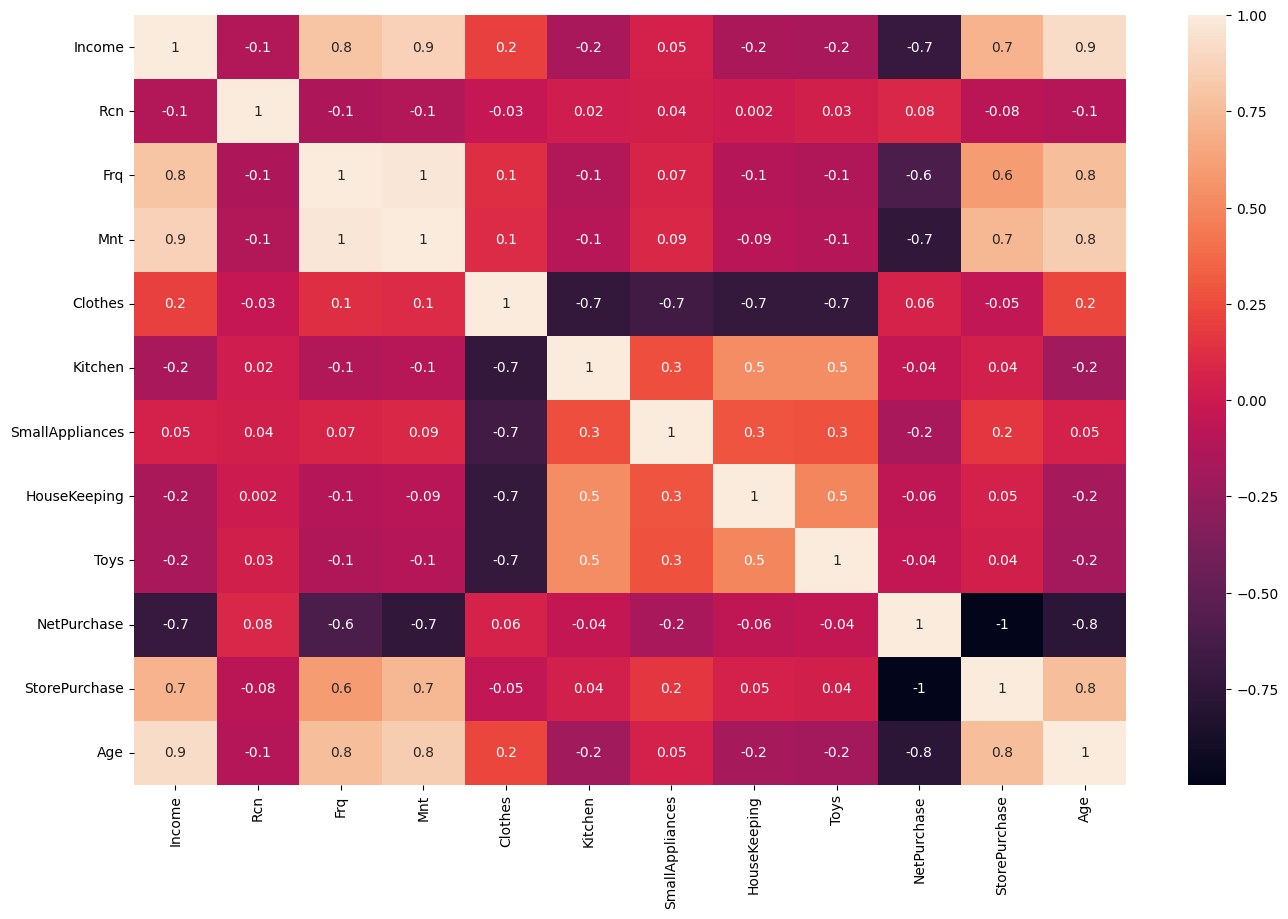

In [159]:
df2_corr = df_transformed.select_dtypes(include=['number']).corr(method = 'pearson')
figure2 = plt.figure(figsize=(16,10))
sns.heatmap(df2_corr, annot=True, fmt = '.1g')

__`Step 45`__ Use the __Variance Inflation Factor (VIF)__ to detecting multicollinearity, with [variance_inflation_factor](https://www.statsmodels.org/stable/generated/statsmodels.stats.outliers_influence.variance_inflation_factor.html). A VIF>5 (meaning a R-squared larger than 80%) is a sign of multicollinearity.

In [46]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

VIF = pd.DataFrame()
VIF['feature'] = df_transformed.columns
VIF['VIF'] = [variance_inflation_factor(df_transformed.values, i) for i in range(df_transformed.shape[1])]
# take a look
VIF.round(2)

,feature,VIF
0,Income,54.25
1,Rcn,5.31
2,Frq,311.74
3,Mnt,224.56
4,Clothes,74.83
5,Kitchen,8.71
6,SmallAppliances,24.22
7,HouseKeeping,8.43
8,Toys,8.33
9,NetPurchase,77.29


__`Step 46`__ Make a copy of the normalized data.

In [160]:
df_transformed2 = df_transformed.copy()

__`Step 47`__ Remove the variables with the higher VIF.

In [161]:
df_transformed2.drop(['Frq','StorePurchase'], axis = 1, inplace = True)

__`Step 48`__ Repeat the VIF test.

In [52]:
VIF = pd.DataFrame()
VIF['feature'] = df_transformed2.columns
VIF['VIF'] = [variance_inflation_factor(df_transformed2.values, i) for i in range(df_transformed2.shape[1])]
# take a look
VIF.round(2)

,feature,VIF
0,Income,49.47
1,Rcn,5.10
2,Mnt,11.73
3,Clothes,15.71
4,Kitchen,5.22
5,SmallAppliances,8.97
6,HouseKeeping,5.06
7,Toys,5.01
8,NetPurchase,12.25
9,Age,36.57


## 5.2. Association between quantitative variables and qualitative variables

As mentioned before, we can check the __association__ between quantitative and qualitative variables. The process involves classifying the quantitative variables and setting contingency tables of counts.

__`Step 49`__ Divide the quantitative variables into classes, a process also known as __binning__, with _bins=15_. Since the observations are larger than 50, we mest choose between 15 and 20 classes or bins.

In [162]:
binned_df = df_transformed.apply(lambda x: pd.cut(x, bins=15, labels=False))
binned_df = pd.DataFrame(binned_df)
binned_df

,Income,Rcn,Frq,Mnt,Clothes,Kitchen,SmallAppliances,HouseKeeping,Toys,NetPurchase,StorePurchase,Age
Custid,,,,,,,,,,,,
1003,2,8,4,0,4,12,6,1,13,8,6,1
1004,9,1,9,9,8,9,5,7,6,4,10,10
1006,1,7,5,0,6,2,11,3,1,10,5,3
1007,7,8,7,4,10,7,3,1,8,6,9,6
1009,11,8,10,11,5,9,8,9,9,1,13,14
...,...,...,...,...,...,...,...,...,...,...,...,...
10989,2,5,4,0,1,14,6,13,2,8,6,0
10991,13,5,13,14,4,5,11,9,8,2,12,14
10993,9,0,9,9,8,8,7,8,1,6,8,10


__`Step 50`__ __Merge__ the binned quantitative variables and the qualitative variables using [join](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.join.html#pandas.DataFrame.join).

In [163]:
merged_df = binned_df.join(qual_df2)
merged_df

,Income,Rcn,Frq,Mnt,Clothes,Kitchen,SmallAppliances,HouseKeeping,Toys,NetPurchase,StorePurchase,Age,Gender,Education,Marital_Status,Dependents,Recomendation
Custid,,,,,,,,,,,,,,,,,
1003,2,8,4,0,4,12,6,1,13,8,6,1,M,Graduation,Married,1,3
1004,9,1,9,9,8,9,5,7,6,4,10,10,M,Master,Married,1,5
1006,1,7,5,0,6,2,11,3,1,10,5,3,F,PhD,Together,1,4
1007,7,8,7,4,10,7,3,1,8,6,9,6,F,Graduation,Single,1,4
1009,11,8,10,11,5,9,8,9,9,1,13,14,F,Graduation,Married,0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10989,2,5,4,0,1,14,6,13,2,8,6,0,F,Basic,Single,1,3
10991,13,5,13,14,4,5,11,9,8,2,12,14,F,Graduation,Married,0,6
10993,9,0,9,9,8,8,7,8,1,6,8,10,F,Graduation,Together,0,4


__`Step 51`__ Perform __ordinal enconding__ on the classes of the quantitative variables and __one-hot enconding__ on the categories of the qualitative variables, using [LabelEncoder](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html).

In [165]:
from sklearn import preprocessing

label = preprocessing.LabelEncoder()
data_encoded = pd.DataFrame(index=original_index) 

for i in merged_df.columns :
  data_encoded[i]=label.fit_transform(merged_df[i])
  
data_encoded

,Income,Rcn,Frq,Mnt,Clothes,Kitchen,SmallAppliances,HouseKeeping,Toys,NetPurchase,StorePurchase,Age,Gender,Education,Marital_Status,Dependents,Recomendation
Custid,,,,,,,,,,,,,,,,,
1003,2,8,4,0,4,11,6,1,12,8,6,1,1,2,1,1,2
1004,9,1,9,9,8,8,5,6,5,4,10,10,1,3,1,1,4
1006,1,7,5,0,6,2,11,2,1,10,5,3,0,4,4,1,3
1007,7,8,7,4,10,6,3,1,7,6,9,6,0,2,3,1,3
1009,11,8,10,11,5,8,8,8,8,1,13,14,0,2,1,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10989,2,5,4,0,1,13,6,12,2,8,6,0,0,1,3,1,2
10991,13,5,13,14,4,4,11,8,7,2,12,14,0,2,1,0,5
10993,9,0,9,9,8,7,7,7,1,6,8,10,0,2,4,0,3


__`Step 52`__ Build a __contingency table__ with [chi2_contingency](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.chi2_contingency.html) and define a function to calculate Cramer's V test.

In [166]:
from scipy.stats import chi2_contingency
import numpy as np

def cramers_V(var1,var2) :
  crosstab =np.array(pd.crosstab(var1,var2, rownames=None, colnames=None)) # Cross table building
  stat = chi2_contingency(crosstab)[0] # Keeping of the test statistic of the Chi2 test
  obs = np.sum(crosstab) # Number of observations
  mini = min(crosstab.shape)-1 # Take the minimum value between the columns and the rows of the cross table
  return np.sqrt(stat/(obs*mini))

__`Step 53`__ Fill in the __Cramer's V test statistic__ for every pair of variables.

In [167]:
rows= []

for var1 in data_encoded:
  col = []
  for var2 in data_encoded :
    cramers =cramers_V(data_encoded[var1], data_encoded[var2]) # Cramer's V test
    col.append(round(cramers,2)) # Keeping of the rounded value of the Cramer's V  
  rows.append(col)
  
cramers_results = np.array(rows)
df_cramer = pd.DataFrame(cramers_results, columns = data_encoded.columns, index =data_encoded.columns)

df_cramer

,Income,Rcn,Frq,Mnt,Clothes,Kitchen,SmallAppliances,HouseKeeping,Toys,NetPurchase,StorePurchase,Age,Gender,Education,Marital_Status,Dependents,Recomendation
Income,1.00,0.10,0.28,0.32,0.18,0.14,0.12,0.15,0.15,0.23,0.23,0.38,0.07,0.16,0.19,0.56,0.23
Rcn,0.10,1.00,0.14,0.12,0.07,0.07,0.06,0.08,0.08,0.08,0.09,0.10,0.09,0.09,0.07,0.13,0.09
Frq,0.28,0.14,1.00,0.53,0.11,0.09,0.09,0.09,0.10,0.21,0.21,0.25,0.10,0.09,0.14,0.55,0.31
Mnt,0.32,0.12,0.53,1.00,0.13,0.10,0.11,0.10,0.11,0.23,0.23,0.29,0.07,0.10,0.16,0.62,0.28
Clothes,0.18,0.07,0.11,0.13,1.00,0.28,0.39,0.28,0.28,0.14,0.14,0.27,0.08,0.29,0.14,0.30,0.09
Kitchen,0.14,0.07,0.09,0.10,0.28,1.00,0.16,0.19,0.19,0.10,0.10,0.19,0.08,0.25,0.12,0.19,0.08
SmallAppliances,0.12,0.06,0.09,0.11,0.39,0.16,1.00,0.16,0.16,0.14,0.14,0.18,0.06,0.10,0.08,0.28,0.08
HouseKeeping,0.15,0.08,0.09,0.10,0.28,0.19,0.16,1.00,0.19,0.10,0.10,0.20,0.06,0.25,0.11,0.19,0.07
Toys,0.15,0.08,0.10,0.11,0.28,0.19,0.16,0.19,1.00,0.11,0.10,0.19,0.07,0.25,0.12,0.20,0.09
NetPurchase,0.23,0.08,0.21,0.23,0.14,0.10,0.14,0.10,0.11,1.00,0.74,0.29,0.07,0.11,0.15,0.69,0.19


__`Step 54`__ Apply a __heatmap__ to the dataframe, for better visualization. Keep the lower triangle only.

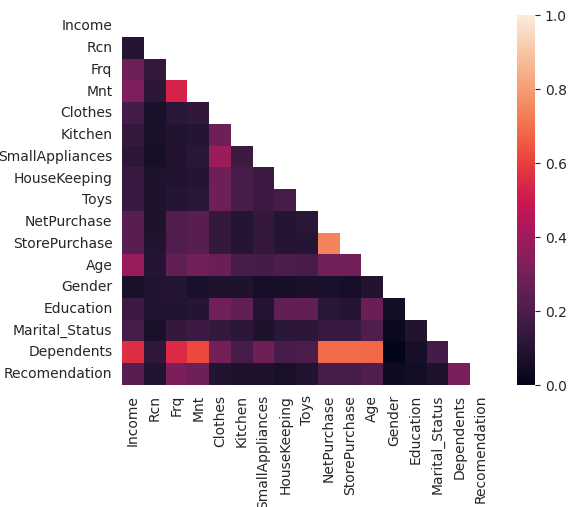

In [168]:
import seaborn as sns
import matplotlib.pyplot as plt

mask = np.zeros_like(df_cramer, dtype=np.bool_)
mask[np.triu_indices_from(mask)] = True

with sns.axes_style("white"):
  ax = sns.heatmap(df_cramer, mask=mask,vmin=0., vmax=1, square=True)

plt.show()

[BACK TO TOC](#toc)
    
# 6. Dimensionality Reduction </font>

## 6.1. Principal Component Analysis (PCA) for quantitative variables

__`Step 55`__ Import the necessary libraries to perform the __Bartlett test__ and the __KMO test__, to determine if PCA is suitable to your quantitative data.

In [73]:
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity, calculate_kmo

__`Step 56`__ Perform __Bartlett sphericity test__ with [calculate_bartlett_sphericity](https://factor-analyzer.readthedocs.io/en/latest/factor_analyzer.html#factor_analyzer.factor_analyzer.calculate_bartlett_sphericity).

In [74]:
chi_square_value, p_value = calculate_bartlett_sphericity(df_transformed2)
print(f'Chi-Square Value: {chi_square_value}')
print(f'P-value: {p_value}')

Chi-Square Value: 20038.38026680263
P-value: 0.0


__`Step 57`__ Perform __KMO test__ with [calculate_kmo](https://factor-analyzer.readthedocs.io/en/latest/factor_analyzer.html#factor_analyzer.factor_analyzer.calculate_kmo).

The Kaiser-Meyer-Olkin (KMO) test does not have specific critical values like significance tests (e.g., p-values) do. Instead, KMO values are typically interpreted on a scale from 0 to 1, and the interpretation is as follows:

- KMO values close to 1 indicate that the data is highly suitable for factor analysis. A KMO value of 0.6 or higher is often considered acceptable.
- KMO values close to 0.5 suggest that the data may be marginal for factor analysis and may benefit from improvement.
- KMO values significantly below 0.5 suggest that the data is not suitable for factor analysis, and you should reconsider whether factor analysis is appropriate for your dataset.

In summary, there is no strict critical value for KMO, but researchers often use the guidelines mentioned above to assess the suitability of their data for factor analysis. Higher KMO values indicate better suitability for factor analysis.

In [75]:
kmo_per_variable, kmo_total = calculate_kmo(df_transformed2)
print(f'KMO per Variable: {kmo_per_variable}')
print(f'KMO Total: {kmo_total}')

KMO per Variable: [0.78040349 0.90454107 0.87213523 0.51775391 0.61378979 0.33554542
 0.61144851 0.60271162 0.86810421 0.77707299]
KMO Total: 0.662248689987804


c:\Users\diogo\AppData\Local\Programs\Python\Python311\Lib\site-packages\factor_analyzer\utils.py:244: UserWarning: The inverse of the variance-covariance matrix was calculated using the Moore-Penrose generalized matrix inversion, due to its determinant being at or very close to zero.
  warnings.warn(


__`Step 58`__ Perform __PCA__ with [PCA](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html).

In [76]:
from sklearn.decomposition import PCA
pca = PCA(n_components=5)
pca.fit(df_transformed2)

PCA(n_components=5)

__`Step 59`__ Print the __proportion of variance explained__ by each factor.

In [77]:
print(pca.explained_variance_ratio_)

[0.61599804 0.26251019 0.06399339 0.02746512 0.01471948]


__`Step 60`__ Plot the __correlation circle__.

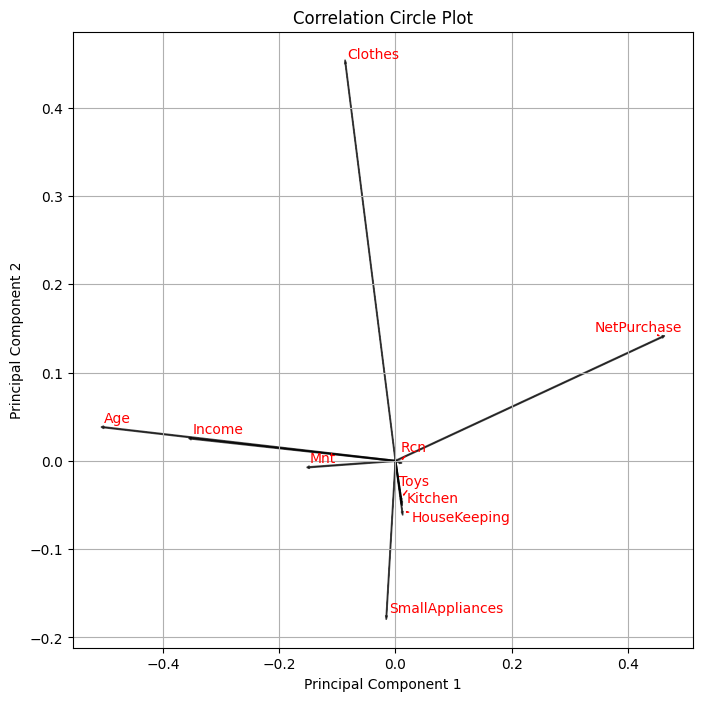

In [169]:
from adjustText import adjust_text

explained_variances = pca.explained_variance_ratio_
loadings = pca.components_.T * np.sqrt(explained_variances)

plt.figure(figsize=(8, 8))
plt.title('Correlation Circle Plot')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

texts = []
for i, feature in enumerate(df_transformed2.columns):

    texts.append(plt.text(loadings[i, 0], loadings[i, 1], feature, color='red')) # Add the name of the variable near the arrow
        
    plt.arrow(0, 0, loadings[i, 0], loadings[i, 1], color='black', alpha=0.7, width=0.001) # Add an arrow representing the variable on the new axis

adjust_text(texts, arrowprops=dict(arrowstyle='->', color='red')) # Use adjust_text to automatically adjust text positions
    
# Fix x-axis between -1 and 1 is important for better visualization
#plt.xlim(-1,1)
#plt.ylim(-1,1)
    
plt.grid(True)

plt.show() 

__`Step 61`__ Create a dataframe to store the __loadings__, i.e., the correlations of each variable with the principal components.

In [85]:
loadings_df = pd.DataFrame(loadings, columns=[f'PC{i+1}' for i in range(pca.n_components_)], index=df_transformed2.columns)

print("Loadings Table:")
print(loadings_df)

Loadings Table:
                      PC1       PC2       PC3       PC4       PC5
Income          -0.351237  0.025267 -0.102610  0.035780 -0.083992
Rcn              0.006736 -0.001497  0.001881 -0.004108  0.000871
Mnt             -0.148131 -0.007151 -0.022341  0.014321 -0.029674
Clothes         -0.085974  0.450117  0.045155 -0.055760 -0.009983
Kitchen          0.010531 -0.046420  0.002136  0.025058  0.003096
SmallAppliances -0.015521 -0.175460 -0.072469 -0.143402 -0.014384
HouseKeeping     0.011596 -0.057296  0.002061  0.028946  0.005593
Toys             0.009567 -0.042379  0.000821  0.021005  0.003453
NetPurchase      0.458969  0.140505 -0.188976  0.019188  0.010417
Age             -0.502017  0.038103 -0.099748  0.003806  0.079471


__`Step 62`__ Add a heatmap to enhance the interpretation. Print only the first two principal components and name them.

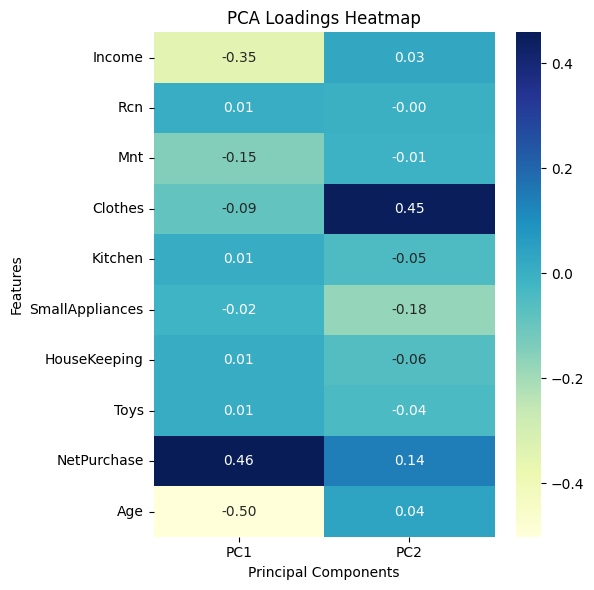

In [108]:
# Plotting the heatmap
plt.figure(figsize=(6, 6))
sns.heatmap(loadings_df[['PC1','PC2']], cmap="YlGnBu", annot=True, fmt=".2f")
plt.title("PCA Loadings Heatmap")
plt.ylabel("Features")
plt.xlabel("Principal Components")

plt.tight_layout()
plt.show()

## 6.2. Multiple Correspondence Analysis (MCA) for qualitative variables

__`Step 63`__ Import prince and perform __Multiple Correspondence Analysis__ with [MCA](https://pypi.org/project/prince/0.6.2/).

In [93]:
import prince
mca = prince.MCA()
mca.fit(qual_df2)

MCA()

__`Step 64`__ Check the variance (inertia) explained by each component.

In [94]:
mca.eigenvalues_summary

,eigenvalue,% of variance,% of variance (cumulative)
component,,,
0,0.291,9.10%,9.10%
1,0.232,7.26%,16.36%


__`Step 65`__ Create an object to store the __cosine similarities__, i.e., the correlations between each variable and each component. Create a __heatmap__ for visualization and better understanding.

In [134]:
cosine_similarities=mca.column_cosine_similarities(qual_df2)

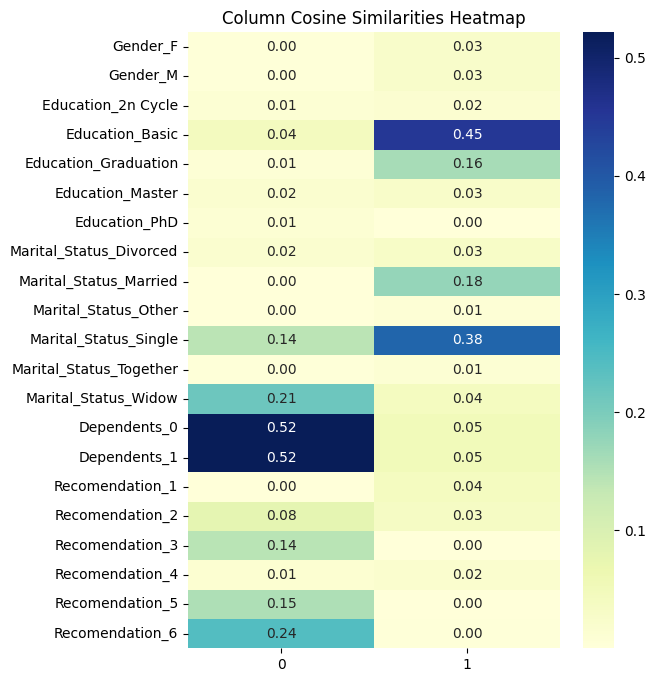

In [136]:
# Create the heatmap
plt.figure(figsize=(6, 8))
sns.heatmap(cosine_similarities, annot=True, fmt=".2f", cmap="YlGnBu")
plt.title("Column Cosine Similarities Heatmap")
plt.show()


__`Step 66`__ Plot the __coordinates of each category__ against the two components, with an __interactive map__.

In [101]:
mca.plot(
    qual_df2,
    x_component=0,
    y_component=1,
    show_column_markers=True,
    show_row_markers=False,
    show_column_labels=True,
    show_row_labels=False
)

alt.LayerChart(...)